**EMPLOYEE ATTRITION ANALYSIS**

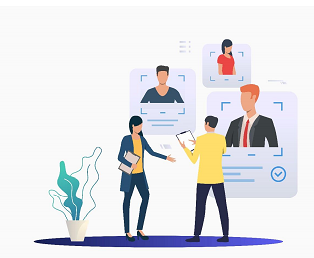

***• Problem Statement:***

 The objective is to predict whether a given employee will go through the attrition or not.


## Loadind Data and Libraries

In [ ]:
# Importing The Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loding and creating the DF
emp = pd.read_csv('/content/Employee_attrition.csv')
emp_original = emp.copy()

# Checking The DF
emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


*How many data-points and features ?*

In [ ]:
emp.shape

(1470, 35)

*What are the columns in our dataset ?*

In [ ]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')



---





---



## EXPLORATORY DATA ANALYSIS

*How many data points for each class are present in target column :*

In [ ]:
print(emp['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64





> It is imbalenced Data Set





*Percentage of data points for each class in Target Column :*

In [ ]:
emp['Attrition'].value_counts(normalize = True)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

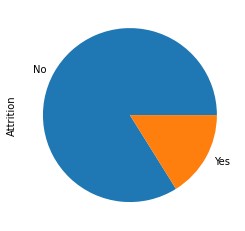

In [ ]:
# (Q)  Draw Bar Plot for each class present?
emp['Attrition'].value_counts(normalize = True).plot.pie();


In [ ]:
# Mean of Yes values in attrition:
emp[emp['Attrition'] == 'Yes'].mean()


Age                            33.607595
DailyRate                     750.362869
DistanceFromHome               10.632911
Education                       2.839662
EmployeeCount                   1.000000
EmployeeNumber               1010.345992
EnvironmentSatisfaction         2.464135
HourlyRate                     65.573840
JobInvolvement                  2.518987
JobLevel                        1.637131
JobSatisfaction                 2.468354
MonthlyIncome                4787.092827
MonthlyRate                 14559.308017
NumCompaniesWorked              2.940928
PercentSalaryHike              15.097046
PerformanceRating               3.156118
RelationshipSatisfaction        2.599156
StandardHours                  80.000000
StockOptionLevel                0.527426
TotalWorkingYears               8.244726
TrainingTimesLastYear           2.624473
WorkLifeBalance                 2.658228
YearsAtCompany                  5.130802
YearsInCurrentRole              2.902954
YearsSinceLastPr

In [ ]:
#  Mean of No values in attrition:
emp[emp['Attrition'] == 'No'].mean()


Age                            37.561233
DailyRate                     812.504461
DistanceFromHome                8.915653
Education                       2.927007
EmployeeCount                   1.000000
EmployeeNumber               1027.656123
EnvironmentSatisfaction         2.771290
HourlyRate                     65.952149
JobInvolvement                  2.770479
JobLevel                        2.145985
JobSatisfaction                 2.778589
MonthlyIncome                6832.739659
MonthlyRate                 14265.779400
NumCompaniesWorked              2.645580
PercentSalaryHike              15.231144
PerformanceRating               3.153285
RelationshipSatisfaction        2.733982
StandardHours                  80.000000
StockOptionLevel                0.845093
TotalWorkingYears              11.862936
TrainingTimesLastYear           2.832928
WorkLifeBalance                 2.781022
YearsAtCompany                  7.369019
YearsInCurrentRole              4.484185
YearsSinceLastPr

In [ ]:
emp.describe().columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#  Find Statistical Information of non-numerical features:
emp.describe(include='object')


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
#  Check for missing values and Datatypes of Data:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#  Drop useless data:
emp.drop(['EmployeeCount', 'StandardHours','Over18','EmployeeNumber'], axis = 1 , inplace= True)



---



### **UNIVARIATE ANALYSIS :**


#### ***Visualize Nominal Data***

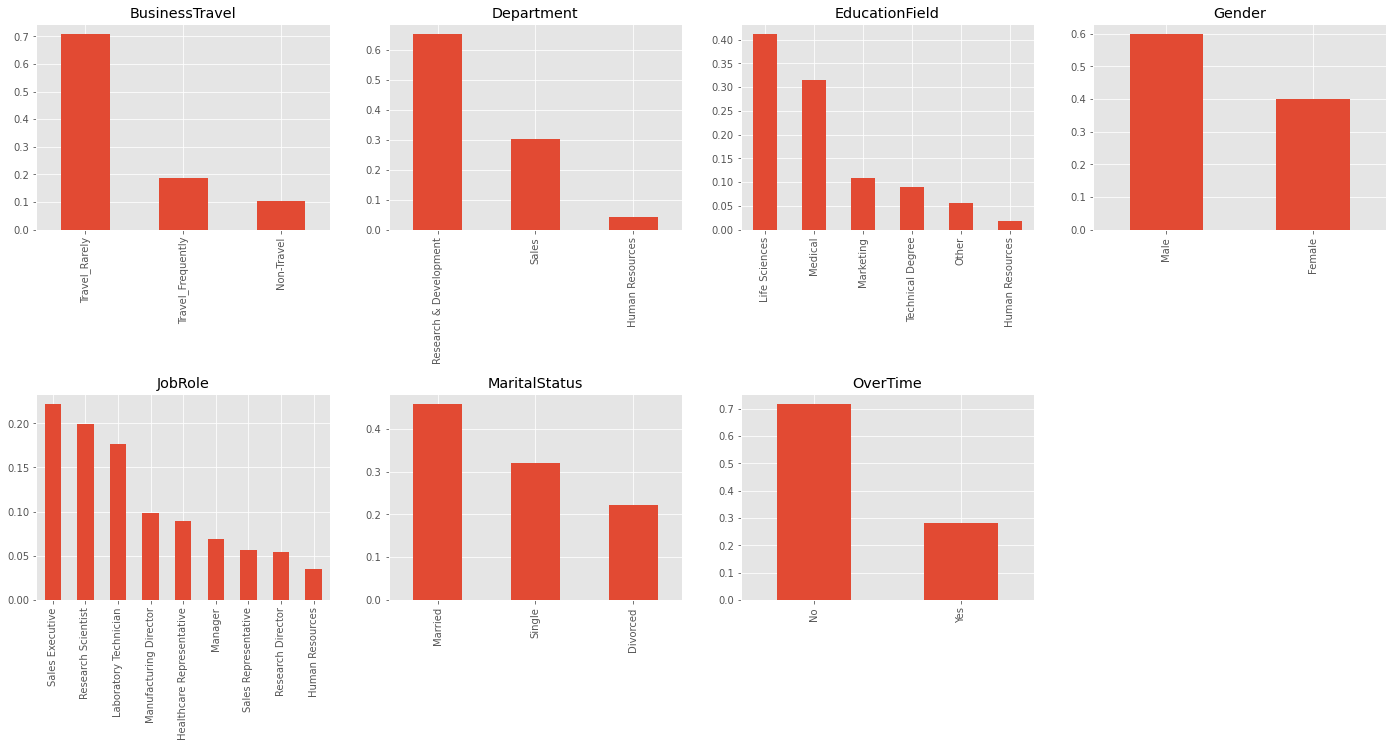

In [ ]:
plt.figure(1)
plt.style.use('ggplot')
plt.subplot(241)
emp['BusinessTravel'].value_counts(normalize = True).plot.bar(figsize = (20,20), title = 'BusinessTravel');

plt.subplot(242)
emp['Department'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'Department');

plt.subplot(243)
emp['EducationField'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'EducationField');

plt.subplot(244)
emp['Gender'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'Gender');

plt.subplot(245)
emp['JobRole'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'JobRole');


plt.subplot(246)
emp['MaritalStatus'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'MaritalStatus');


plt.subplot(247)
emp['OverTime'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'OverTime');

plt.subplots_adjust(left=0.125  , bottom=0.1, right=2, top=0.9, wspace=0.2, hspace=0.8)


From the plots obtained above,following are the insights:

**BUSINESS TRAVEL**
*   Employes who Travel Rarely are in Majority when compared to Employes who Travel Frequently.
*   There are very less number of employes who do-not Travel, Hence fall under  the category of employes -(Non-Travel).

**DEPARTMENTS**
*   The Department containing more number of employes is Research & development i.e - 65% of employes among all the employes.
*   Human Resource Department has very less number of employes i.e 5% where as Sales Department has 30% of employes and falls under second place.

**EDUCATION FIELD**
*   Employes from educational background,
Life Sciences - 42%,
Medical - 33%,
Marketing - 10%,
Technical Degree - 7%,
Other - 6%,
HR - 3%.
*  This shows the Firm has less employes from Technical Educational Background.

**JOB ROLE**
*   There are large number of Sales execuitives in this firm with 24% of employes, when compared to other Job Roles, where as Research Scientists are at second largest number with 20% of all the employes.
*   this shows even after having less number of emoployes from technical background, more number of Research Scientists have been recruited.
*   Jobe Role for HR has less number of employes with only 2%.
*   Where as employes in other job roles are equal to the percentage of educational background required for that particular Job Role.

**MARITAL STATUS**
*   The firm consists of more number of Married Employes of 48% where as the unmarried employes are 32%.
*   There are 22% employes who have got divorced.

**OVER TIME**
*   Among all the employes Only 29% of employes work Over Time where as 71% of employes do not work Over Time.





















---



#### ***Visualize Ordinal Data***

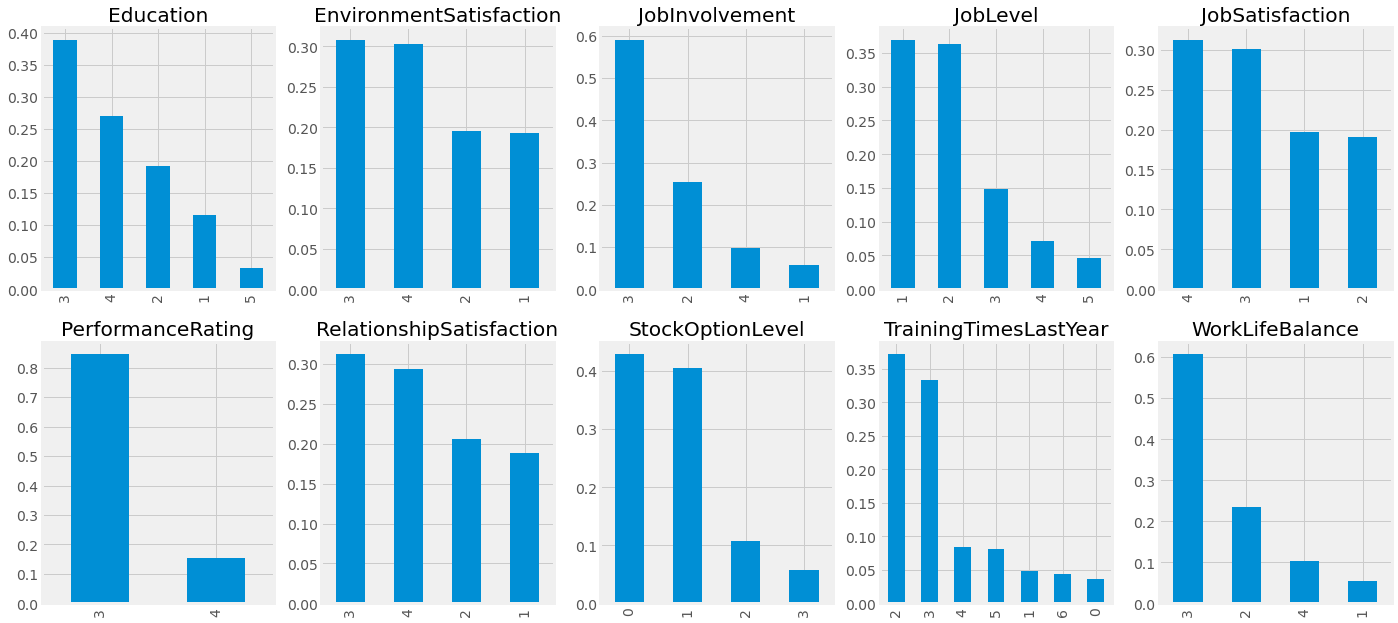

In [ ]:
plt.figure(2)
plt.style.use('fivethirtyeight')

plt.subplot2grid((2,5), (0,0))
emp['Education'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'Education');

plt.subplot2grid((2,5), (0,1))
emp['EnvironmentSatisfaction'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'EnvironmentSatisfaction');

plt.subplot2grid((2,5), (0,2))
emp['JobInvolvement'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'JobInvolvement');

plt.subplot2grid((2,5), (0,3))
emp['JobLevel'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'JobLevel');

plt.subplot2grid((2,5), (0,4))
emp['JobSatisfaction'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'JobSatisfaction');

plt.subplot2grid((2,5), (1,0))
emp['PerformanceRating'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'PerformanceRating');

plt.subplot2grid((2,5), (1,1))
emp['RelationshipSatisfaction'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'RelationshipSatisfaction');

plt.subplot2grid((2,5), (1,2))
emp['StockOptionLevel'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'StockOptionLevel');

plt.subplot2grid((2,5), (1,3))
emp['TrainingTimesLastYear'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'TrainingTimesLastYear');

plt.subplot2grid((2,5), (1,4))
emp['WorkLifeBalance'].value_counts(normalize = True).plot.bar(figsize = (10,10), title = 'WorkLifeBalance');

plt.subplots_adjust(left=0.125  , bottom=0.1, right=2, top=0.9, wspace=None, hspace=0.2)



**Visualization of Ordinal Data has been done and the insights are :**

**EDUCATION :**
*   About 39% of Employes belong to Education rating 3.
*   Education rating 5 has only 4% of employes where as 1,2,3 has 11%,19%,26% which shows there are less number of employes who have highest degree.

**ENVIRONMENT SATISFACTION**
*   32% of employes have given 3 and 4 rating for Environment Satisfaction where as 19% of employes have given 1,2 rating.
*   This shows Employes are Acceptably satisfied with the Environment.

**JOB INVOLVEMENT**
*   60% employes have been assigned rating-3 for their job envolvement where as only 10% of employes have been effeciently involvintg in their jobs with rating 4.
*  Very Less number of employes i.e only 7% are not being dedicatedly involved in their jobs.

**JOB LEVEL**
*   37 and 36% of employes are low level job holders who can also be called as Blue Collerd Employes
*   4-8 %  of employes are white collored job holders who work in higher level of Job Roles.

**JOB SATISFACTION**
*   30-33% of employes are satisfied with their jobs.
*   19-20% of employes are a little less satisfied with their jobs.

**PERFORMANCE RATING**
*   19% of employes have been given a good Performance Rating.
*   And above 80% of employes have been given Satisfactory Performance Rating.

**RELATIONSHIP SATISFACTION**
*   32-27% of employes are satisfied with their relationships.
*   Where as 22-17% of employes are a little less satisfied with their relationships.

**STOCK OPTION LEVEL**
*   Much Employes are not intrested in Stock Option about 41-45%.
*   Whereas only 7-11% of employes are intrested in Stock Option.

**TRAINING TIMES LAST YEAR**
*   33-38% of employes with poor performance of 2,3 ratings have been trained last year
*   5 - 9 % of employes with good ratings of 4,5,6 have been trained last year.

**WORK LIFE BALANCE**
*   60 % of employes have a good work life balance.
*   5-22% of employes do not have a good worklife balance and are also have poor performance in job.


















---



#### ***Visualize Numerical Data***

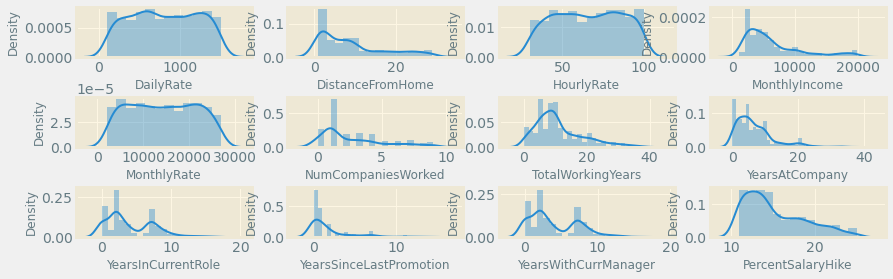

In [ ]:
plt.figure(2)
plt.style.use('Solarize_Light2')

plt.subplot2grid((3,4), (0,0))
sns.distplot(emp['DailyRate']);

plt.subplot2grid((3,4), (0,1))
sns.distplot(emp['DistanceFromHome']);

plt.subplot2grid((3,4), (0,2))
sns.distplot(emp['HourlyRate']);

plt.subplot2grid((3,4), (0,3))
sns.distplot(emp['MonthlyIncome']);

plt.subplot2grid((3,4), (1,0))
sns.distplot(emp['MonthlyRate']);

plt.subplot2grid((3,4), (1,1))
sns.distplot(emp['NumCompaniesWorked']);

plt.subplot2grid((3,4), (1,2))
sns.distplot(emp['TotalWorkingYears']);

plt.subplot2grid((3,4), (1,3))
sns.distplot(emp['YearsAtCompany']);

plt.subplot2grid((3,4), (2,0))
sns.distplot(emp['YearsInCurrentRole']);

plt.subplot2grid((3,4), (2,1))
sns.distplot(emp['YearsSinceLastPromotion']);

plt.subplot2grid((3,4), (2,2))
sns.distplot(emp['YearsWithCurrManager']);

plt.subplot2grid((3,4), (2,3))
sns.distplot(emp['PercentSalaryHike']);

plt.subplots_adjust(left=0.125  , bottom=0.1, right=2, top=0.9, wspace=None, hspace=0.8)

**Numerical data has been viasualized and the insights are :**
*   The Curve Obtained after plotting must be Bell Shaped, which indicates the normal distribution of data.
*   DailyRate, HourlyRate, MonthlyRate are perfectly bell shaped i.e they are normally distributed.
*   All the other features are Left Skewed because of which our model might not perform well, Hence we need to make it normally distributed.







---



### **OUTLIERS**

***OUTLIERS :***

*Outliers are extreme values that fall a long way outside of the other observations. For example, in a normal distribution, outliers may be values on the tails of the distribution.*

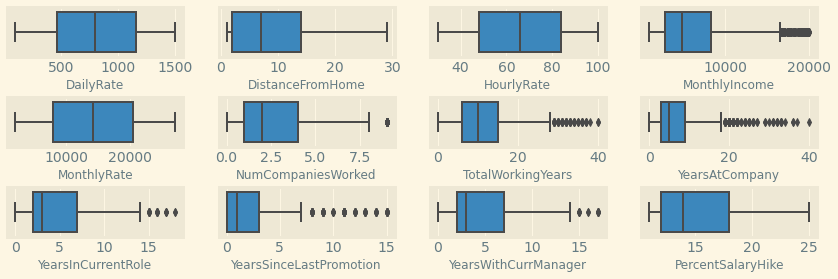

In [ ]:
plt.figure(2)
plt.style.use('Solarize_Light2')

plt.subplot2grid((3,4), (0,0))
sns.boxplot(emp['DailyRate']);

plt.subplot2grid((3,4), (0,1))
sns.boxplot(emp['DistanceFromHome']);

plt.subplot2grid((3,4), (0,2))
sns.boxplot(emp['HourlyRate']);

plt.subplot2grid((3,4), (0,3))
sns.boxplot(emp['MonthlyIncome']);

plt.subplot2grid((3,4), (1,0))
sns.boxplot(emp['MonthlyRate']);

plt.subplot2grid((3,4), (1,1))
sns.boxplot(emp['NumCompaniesWorked']);

plt.subplot2grid((3,4), (1,2))
sns.boxplot(emp['TotalWorkingYears']);

plt.subplot2grid((3,4), (1,3))
sns.boxplot(emp['YearsAtCompany']);

plt.subplot2grid((3,4), (2,0))
sns.boxplot(emp['YearsInCurrentRole']);

plt.subplot2grid((3,4), (2,1))
sns.boxplot(emp['YearsSinceLastPromotion']);

plt.subplot2grid((3,4), (2,2))
sns.boxplot(emp['YearsWithCurrManager']);

plt.subplot2grid((3,4), (2,3))
sns.boxplot(emp['PercentSalaryHike']);

plt.subplots_adjust(left=0.125  , bottom=0.1, right=2, top=0.9, wspace=None, hspace=0.8)

***OUTLIER ANALYSIS IN GIVEN DATA :***

*   DailyRate, DistanceFromHome, HourlyRate, MonthlyRate, PercentageSalaryHike doesn't have any outliers.
*   MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager has outliers.
*   NumCompaniesWorked, YearsWithCurrManager,YearsInCurrentRole has very few outliers.
*   YearsSinceLastPromotion has moderate number of outliers.
*   Monthly Income,TotalWorkingYears, YearsAtCompany has somany Outliers.
*   Most of the outliers looks like True Values.








In [ ]:
emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
#MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager



---



### **BIVARIATE ANALYSIS**

**Plotting Target Variable Vs Nominal Data**

**ANALYSIS OF BUSINESS TRAVEL AND DEPARTMENTS WITH ATTRITION :**

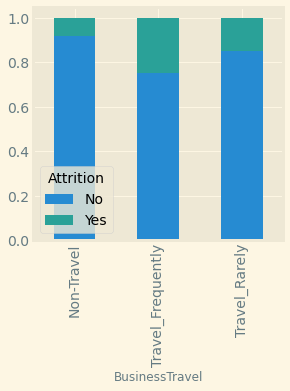

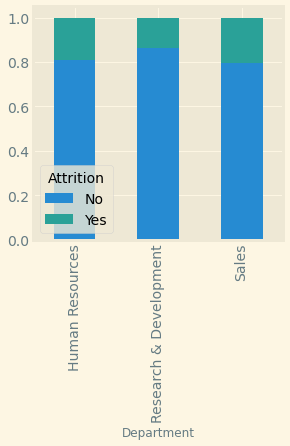

In [ ]:
BTravel = pd.crosstab(emp['BusinessTravel'], emp['Attrition'])
BTravel.div(BTravel.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Dep = pd.crosstab(emp['Department'], emp['Attrition'])
Dep.div(Dep.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

*INSIGHTS OF BIVARIENT ANALYSIS OF BUSINESS TRAVEL AND DEPARTMENTS WITH ATTRITION :*

**BUSINESS TRAVEL - ATTRITION :**
*   Employes Travelling Frequently are having more chances of Attrition and Employes with No -Travel have a very less chance of attrrition.  
*   This shows that Employes are not willing to travel or travelling is equiped with tough tasks.

**DEPARTMENT - ATTRITION**
*   Sales ans HR Departments have equal amount of attrition about 20%.
*   R&D has slightly less amount of employes attrition around 15%.









---



**ANALYSIS OF EDUCATION FIELD AND GENDER WITH ATTRITION :**

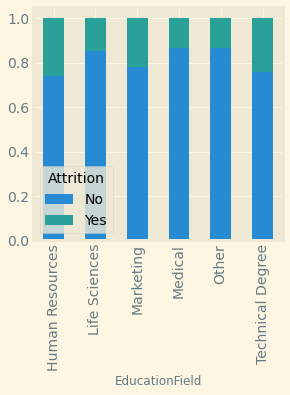

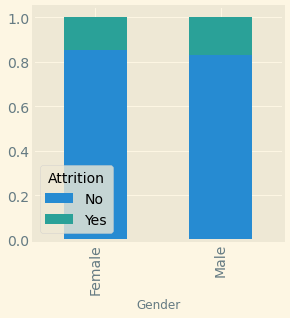

In [ ]:
Edfield = pd.crosstab(emp['EducationField'], emp['Attrition'])
Edfield.div(Edfield.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Gen = pd.crosstab(emp['Gender'], emp['Attrition'])
Gen.div(Gen.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));


*INSIGHTS OF BIVARIENT ANALYSIS OF EDUCATION FIELD AND GENDER WITH ATTRITION :*

**EDUCATION FIELD - ATTRITION**
*   Employes belonging to Education Field of HR have shown more amount of attrition i.e 27% when compared to empoloyes of other Eduicational Field.
*   Next comes employes with Technical Degrees followed by Employes with Marketing Educational Field.

*This shows even after having less number of employes in HR department, more amoumt of attrition is seen.*

**GENDER-ATTRITION**
*   It is cleary seen that majority of attriton is found in males i.e 17% when compared to females 14%.

*It can be observed that males from HR, Technical Degree and Marketing Educational Fields are attritioning more.*








---



**ANALYSIS OF JOB ROLE, MARITAL STATUS AND OVER TIME WITH ATTRITION :**

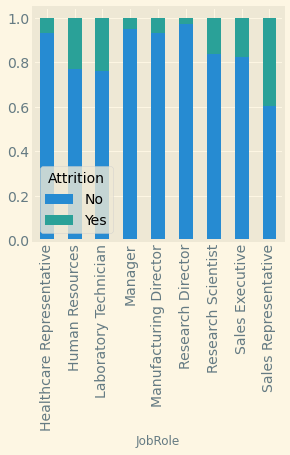

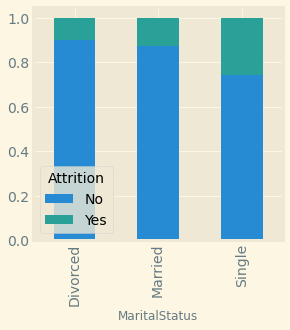

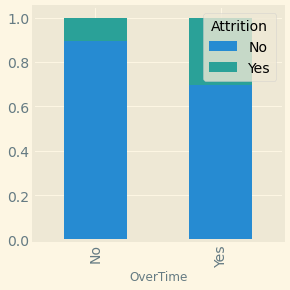

In [ ]:
Jobrole = pd.crosstab(emp['JobRole'], emp['Attrition'])
Jobrole.div(Jobrole.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

MarStatus = pd.crosstab(emp['MaritalStatus'], emp['Attrition'])
MarStatus.div(MarStatus.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Otime = pd.crosstab(emp['OverTime'], emp['Attrition'])
Otime.div(Otime.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));


*INSIGHTS OF BIVARIANT ANALYSIS OF JOB ROLE, MARITAL STATUS AND OVER TIME WITH ATTRITION :*

**JOBROLE - ATTRITION**
*   Sales Representatives are showing more attrition i.e 40% when compared to other job roles.
*   Around 22 - 25% of employes of Human Resources and Laboratory Technicians have shown attriton next to Sales Representatives followed by Research Scientists and Sales executives.

*Employes of higher job roles have shown less Attrition percentages which shows their commitment towards firm, where as emoloyes with other roles have higher Attrition levels* .


**MARITAL STATUS - ATTRITION**
*   It is seen that Married and Divorced employes have less attrition levels when compared to employes who are Single

*Unstability or career switch may be the reason for Employes who are Single to show higher Attrition*.


**OVERTIME - ATTRITION**


*   Employes working Overtime have higher attrition levels i.e 30% than employes who do not work over time.

*Overtime work burden may be a cause of attrition seen in employes*





---



**Plotting Target Variable Vs Nominal Data**



**ANALYSIS OF EDUCATION, ENVIRONMENT SATISFACTION AND JOB SATISFACTION WITH ATTRITION :**

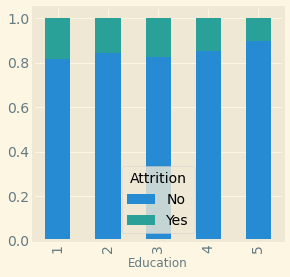

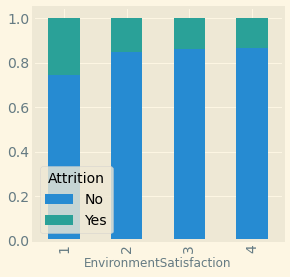

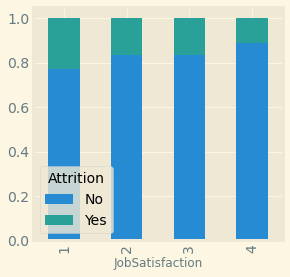

In [ ]:
Edu = pd.crosstab(emp['Education'], emp['Attrition'])
Edu.div(Edu.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

EnvSat = pd.crosstab(emp['EnvironmentSatisfaction'], emp['Attrition'])
EnvSat.div(EnvSat.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Jobsatisfaction = pd.crosstab(emp['JobSatisfaction'], emp['Attrition'])
Jobsatisfaction.div(Jobsatisfaction.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

*INSIGHTS OF ANALYSIS OF EDUCATION, ENVIRONMENT SATISFACTION AND JOB SATISFACTION WITH ATTRITION :*

**EDUCATION - ATTRITION**
*   Less educated Employes have shown 29% of attrition whereas highly educated employes have shown only 8-14% of attrition.

**ENVIRONMENT SATISFACTION - ATTRITION**
*   About 23% of employes have shown Dissatisfaction towards working Environment and have shown attrition.
*   15 % of employes are satisfied with their working environment resulting in less attrition.

**JOB SATISFACTION - ATTRITION**
*   23% of employes are not satisfied with their jobs as seen when analysed with all the factors and are willing to leave the jobs.






---



**ANALYSIS OF JOB INVOLVEMENT, JOB LEVEL AND PERFORMANCE RATING WITH ATTRITION :**

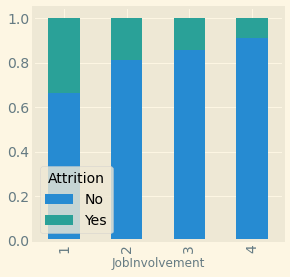

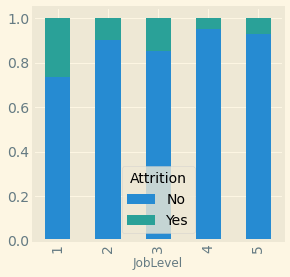

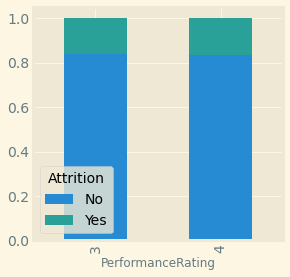

In [ ]:
Jobinvolvement = pd.crosstab(emp['JobInvolvement'], emp['Attrition'])
Jobinvolvement.div(Jobinvolvement.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Joblevel = pd.crosstab(emp['JobLevel'], emp['Attrition'])
Joblevel.div(Joblevel.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Performance_rating = pd.crosstab(emp['PerformanceRating'], emp['Attrition'])
Performance_rating.div(Performance_rating.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

*INSIGHTS OF ANALYSIS OF JOB INVOLVEMENT, JOB LEVEL AND PERFORMANCE RATING WITH ATTRITION :*

**JOB INVOLVEMENT - ATTRITION**
*   Employes with less job involvement have shown around 32% of attrition where as employes with higher job involvement have shown only 10% of attrition.



**JOB LEVEL - ATTRITION**
*   Among the employes with less job involvement, employes with lower job levels have shown higher amount of attrition i.e - 25%, where as employes of higher levels have shown a very less attrition.  

*This shows the commitment towards the responcibilities taken by Employes of Higher Job Levels*.

**PERFORMANCE RATING - ATTRITION**

Performance rating is given without any bias
*   Employes have shown equal amount of attrition levels irrespective of Performance Rating.





---



**ANALYSIS OF RELATIONSHIP SATISFACTION AND STOCK OPTION LEVELS WITH ATTRITION :**

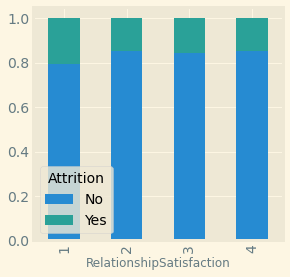

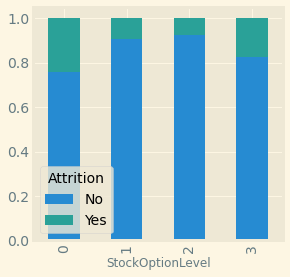

In [ ]:
Relationship_Satisfaction = pd.crosstab(emp['RelationshipSatisfaction'], emp['Attrition'])
Relationship_Satisfaction.div(Relationship_Satisfaction.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

Stock_Option_Level = pd.crosstab(emp['StockOptionLevel'], emp['Attrition'])
Stock_Option_Level.div(Stock_Option_Level.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

*INSIGHTS OF ANALYSIS OF RELATIONSHIP SATISFACTION, STOCK OPTION LEVEL AND PERFORMANCE RATING WITH ATTRITION :*

**RELATIONSHIP SATISFACTION - ATTRITION**

*   Employees with Relationship Satisfaction rating 1 has undergone 20% attrition
*   Employees with Relationship Satisfaction rating 2,3,4 has almost same percent of attrition i.e around 15%

**STOCK OPTION LEVEL - ATTRITION**


*   Highest and Lowest Stock option level has high percentage of attrition. The attrition is around 20%
*   Employees with Stock option level 1,2 has almost same percent of attrition i.e around 10%




---



**ANALYSIS OF TRAINING TIMES LAST YEAR AND WORK LIFE BALANCE WITH ATTRITION**

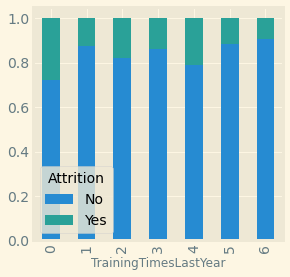

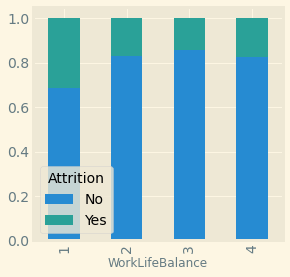

In [ ]:
Training_Times_LastYear = pd.crosstab(emp['TrainingTimesLastYear'], emp['Attrition'])
Training_Times_LastYear.div(Training_Times_LastYear.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

WorkLife_Balance = pd.crosstab(emp['WorkLifeBalance'], emp['Attrition'])
WorkLife_Balance.div(WorkLife_Balance.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));

*INSIGHTS OF ANALYSIS OF TRAINING TIMES LAST YEAR AND WORK LIFE BALANCE WITH ATTRITION :*

**TRAINING TIMES LAST YEAR - ATTRITION**


*   Data says more trainings per year tending to less attrition( 5 to 6 trainings per year)
*   Zero training per year lead to 30% attrition which is highest
*   Training once per year also has less attrition percentage as training 5,6 times
*  Training 2,3,4 times per year has around 20% attrition

**WORK LIFE BALANCE - ATTRITION**
*   Worst Work life balance has high attrition
*   Attrition in all other ratings are almost same



---



**Plotting Target Variable Vs Numeric Data**


**DAILY RATE PERCENTAGE**

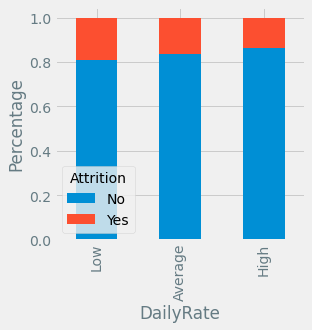

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,500,1000,1499]
group = ['Low','Average','High']

emp['DailyRate_bin'] = pd.cut(emp['DailyRate'], bins,labels= group)

DailyRate_bin = pd.crosstab(emp['DailyRate_bin'], emp['Attrition'])
DailyRate_bin.div(DailyRate_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('DailyRate')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF DAILY RATE WITH ATTRITION :*

**DAILY RATE - ATTRITION**
*   It can be seen that Higher the daily rate lower the percentage of attrition.




---



**DISTANCE FROM HOME**

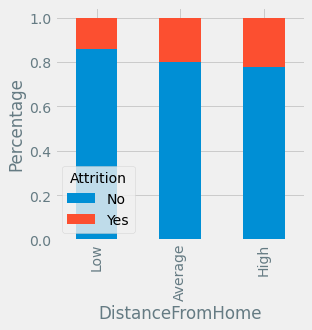

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,10,20,29]
group = ['Low','Average','High']

emp['DistanceFromHome_bin'] = pd.cut(emp['DistanceFromHome'], bins,labels= group)

DistanceFromHome_bin = pd.crosstab(emp['DistanceFromHome_bin'], emp['Attrition'])
DistanceFromHome_bin.div(DistanceFromHome_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('DistanceFromHome')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF DISTANCE FROM HOME WITH ATTRITION :*

**DISTANCE FROM HOME - ATTRITION**
*   Distance from home also has the affect on Job Performance and Attrition, Higher the Distance from home, Higher the percentage of Attrition.



---



**HOURLY RATE**

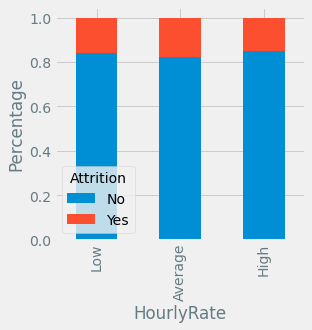

In [ ]:
plt.style.use('fivethirtyeight')

bins = [25,50,75,100]
group = ['Low','Average','High']

emp['HourlyRate_bin'] = pd.cut(emp['HourlyRate'], bins,labels= group)

HourlyRate_bin = pd.crosstab(emp['HourlyRate_bin'], emp['Attrition'])
HourlyRate_bin.div(HourlyRate_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('HourlyRate')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF HOURLY RATE WITH ATTRITION :*

**HOURLY RATE - ATTRITION**
*   Low ,Average and High hourly rate has almost same percentage of attrition


*Hourly Rate not impacting Attrition much*.




---



**MONTHLY INCOME**

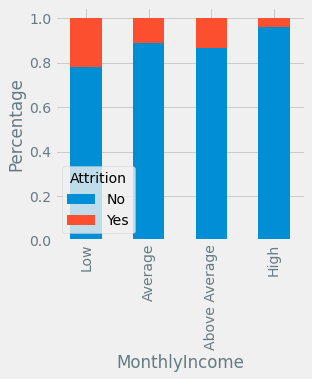

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,5000,10000,15000,20000]
group = ['Low','Average','Above Average','High']

emp['MonthlyIncome_bin'] = pd.cut(emp['MonthlyIncome'], bins,labels= group)

MonthlyIncome_bin = pd.crosstab(emp['MonthlyIncome_bin'], emp['Attrition'])
MonthlyIncome_bin.div(MonthlyIncome_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('MonthlyIncome')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF MONTHILY INCOME WITH ATTRITION :*

**MONTHILY INCOME - ATTRITION**
*   Higher the monthly income, lesser the attrition
*   Lower Monthly income has highest attrition i.e 22%
*   Average and Above Average Monthly Income has almost same percentage of attrition i.e 15%



---



**MONTHLY RATE**

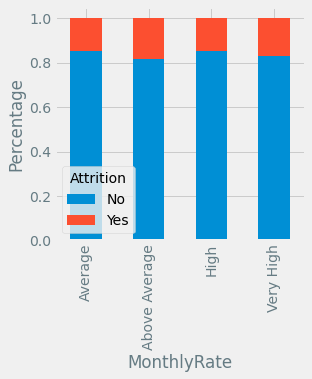

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,2000,10000,15000,20000,27000]
group = ['Low','Average','Above Average','High','Very High']

emp['MonthlyRate_bin'] = pd.cut(emp['MonthlyRate'], bins,labels= group)

MonthlyRate_bin = pd.crosstab(emp['MonthlyRate_bin'], emp['Attrition'])
MonthlyRate_bin.div(MonthlyRate_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('MonthlyRate')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF MONTHILY RATE WITH ATTRITION :*

**MONTHLY RATE - ATTRITION**
*   Attrition in all Monthly Rate categories are almost same.
*   All categories have attrition around 15% to 20%.



---



**NUMBER OF COMPANIES WORKED**

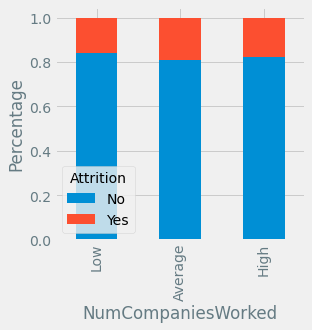

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,3,7,10]
group = ['Low','Average','High']

emp['NumCompaniesWorked_bin'] = pd.cut(emp['NumCompaniesWorked'], bins,labels= group)

NumCompaniesWorked_bin = pd.crosstab(emp['NumCompaniesWorked_bin'], emp['Attrition'])
NumCompaniesWorked_bin.div(NumCompaniesWorked_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF NUMBER OF COMPANIES WORKED WITH ATTRITION :*

**NUMBER OF COMPANIES WORKED - ATTRITION**
*   Attrition is almost the same in all categories
*   All categories have attrition around 15% to 20%



---



**TOTAL WORKING YEARS**

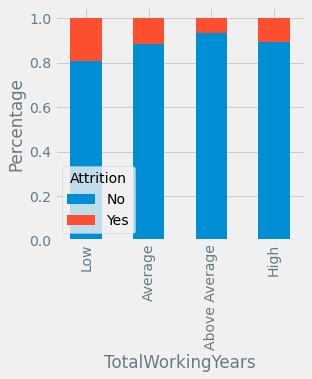

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,10,20,30,40]
group = ['Low','Average','Above Average','High']

emp['TotalWorkingYears_bin'] = pd.cut(emp['TotalWorkingYears'], bins,labels= group)

TotalWorkingYears_bin = pd.crosstab(emp['TotalWorkingYears_bin'], emp['Attrition'])
TotalWorkingYears_bin.div(TotalWorkingYears_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('TotalWorkingYears')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF TOTAL WORKING YEARS WITH ATTRITION :*

**TOTAL WORKING YEARS - ATTRITION**
*   From Low to Above Average category the percentage of attrition has decreased i.e from 20% to 8%
*   High Experienced category has bit high attrition percentage of 15%



---



**YEARS AT COMPANY**

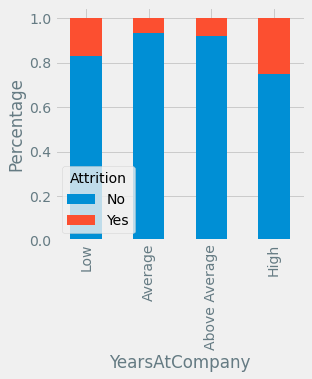

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,10,20,30,40]
group = ['Low','Average','Above Average','High']

emp['YearsAtCompany_bin'] = pd.cut(emp['YearsAtCompany'], bins,labels= group)

YearsAtCompany_bin = pd.crosstab(emp['YearsAtCompany_bin'], emp['Attrition'])
YearsAtCompany_bin.div(YearsAtCompany_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('YearsAtCompany')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF YEARS AT COMPANY WITH ATTRITION :*

**YEARS AT COMPANY - ATTRITION**
*   Attrition percentage is very uneven in Years at Company feature
*   Average and Above Average categories has less and almost same percentage of attrition
*   Low and high years in company have a higher rate of attrition



---



**YEARS IN CURRENT ROLE**

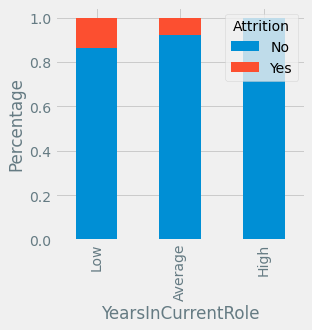

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,10,15,18]
group = ['Low','Average','High']

emp['YearsInCurrentRole_bin'] = pd.cut(emp['YearsInCurrentRole'], bins,labels= group)

YearsInCurrentRole_bin = pd.crosstab(emp['YearsInCurrentRole_bin'], emp['Attrition'])
YearsInCurrentRole_bin.div(YearsInCurrentRole_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF YEARS IN CURRENT ROLE WITH ATTRITION :*

**YEARS IN CURRENT ROLE - ATTRITION**
*   The greater the number of years in the current position, the lower the attrition rate

*Employes tend to show their intrest in their respective roles*



---



**YEAR SINCE LAST PROMOTION**

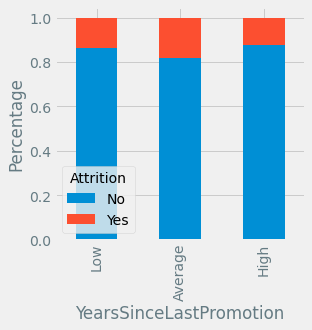

In [ ]:
plt.style.use('fivethirtyeight')

bins = [0,5,10,15]
group = ['Low','Average','High']

emp['YearsSinceLastPromotion_bin'] = pd.cut(emp['YearsSinceLastPromotion'], bins,labels= group)

YearsSinceLastPromotion_bin = pd.crosstab(emp['YearsSinceLastPromotion_bin'], emp['Attrition'])
YearsSinceLastPromotion_bin.div(YearsSinceLastPromotion_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF YEARS SINCE LAST PROMOTION WITH ATTRITION :*

**YEARS SINCE LAST PROMOTION - ATTRITION**
*   The attrition rate is same in Low and High categories of data
*   Average category has highest attrition rate of 20%



---



**YEARS WITH CURRENT MANAGER AND PERCENTAGE SALARY HIKE**

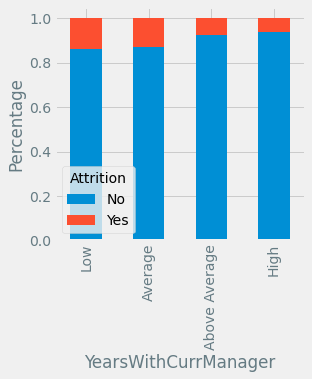

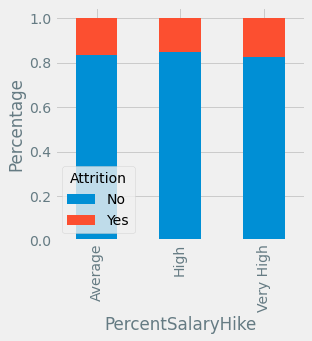

In [ ]:


bins = [0,4,8,12,17]
group = ['Low','Average','Above Average','High']

emp['YearsWithCurrManager_bin'] = pd.cut(emp['YearsWithCurrManager'], bins,labels= group)

YearsWithCurrManager_bin = pd.crosstab(emp['YearsWithCurrManager_bin'], emp['Attrition'])
YearsWithCurrManager_bin.div(YearsWithCurrManager_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Percentage')
plt.show()


bins = [0,10,15,20,25]
group = ['Low','Average','High','Very High']

emp['PercentSalaryHike_bin'] = pd.cut(emp['PercentSalaryHike'], bins,labels= group)

PercentSalaryHike_bin = pd.crosstab(emp['PercentSalaryHike_bin'], emp['Attrition'])
PercentSalaryHike_bin.div(PercentSalaryHike_bin.sum(1).astype(float),axis = 0).plot(kind = "bar", stacked = True,figsize=(4,4));
plt.xlabel('PercentSalaryHike')
plt.ylabel('Percentage')
plt.show()

*INSIGHTS OF ANALYSIS OF YEARS WITH CURRENT MANAGER AND PERCENT SALARY HIKE WITH ATTRITION :*

**YEARS WITH CURRENT MANAGER - ATTRITION**
*   The greater the number of years with current manager, the lower the attrition rate

*Relationship between Employes with their Managers is Productive and results to show less Attrition Rate*.


**PERCENT SALARY HIKE - ATTRITION**
*   Attrition rate is almost same in all categories with respect to Percent  Salary hike
*   This feature does not seem to impact attrition much.



---



**SCATTER PLOTS TO VISUALIZE THE FACTORS AFFECTING SUCCESSIVE FACTORS RESULTING IN ATTRITION**

**Department - Age**

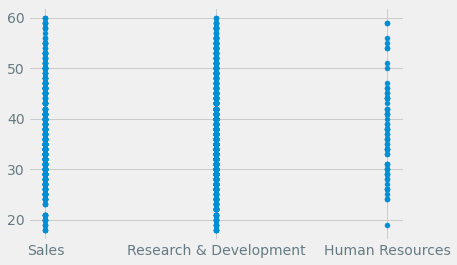

In [ ]:
plt.scatter(emp['Department'], emp['Age'], s=25 )

*INSIGHTS FROM VISUALIZATION OF DEPARTMENT WISE AGE OF EMPLOYES :*

**DEPARTMENT - AGE**
*  R&D department has employes of ages varying from 20 - 60 years, employes of different age groups can be found in R&D department.
*  In Sales Department very few employes of age 20 to 25 can be found and a larg number of employes are of ages between 28-60.
*  In HR Department, most of the employes are between age 25 - 45, and we can see less employes of age 20 - 25.

*Even if there are less employes in HR Department, it is controlled by Experienced Employes* .




---



**PERCENTAGE OF EMPLOYES IN EACH DEPARTMENT**


([<matplotlib.patches.Wedge at 0x7f9fb061e160>,
 [Text(1.1891397135290385, 0.16107992335507318, 'Human Resources'),
  Text(-0.8199596948296615, 0.876165565892, 'Research & Development'),
  Text(0.6949282151998851, -0.9783019859527539, 'Sales')],
 [Text(0.6936648328919391, 0.09396328862379269, '4.29%'),
  Text(-0.47830982198396915, 0.5110965801036667, '65.37%'),
  Text(0.405374792199933, -0.5706761584724397, '30.34%')])

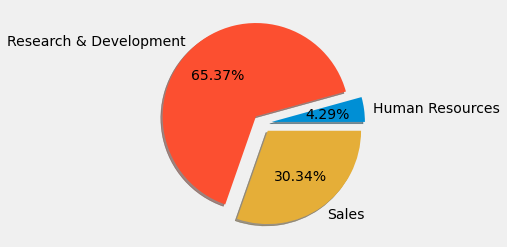

In [ ]:
HR = len(emp[emp['Department']=='Human Resources'])
R_n_D  = len(emp[emp['Department']=='Research & Development'])
Sales = len(emp[emp['Department']=='Sales'])
total_depts = [HR, R_n_D, Sales]
plt.pie(total_depts, labels=['Human Resources', 'Research & Development', 'Sales'],shadow = True, explode = [0.1,0.1,0.1], autopct= '%1.2f%%')

*INSIGHTS FROM VISUALIZATION OF EMPLOYES FROM EACH DEPARTMENT :*

*   R&D department consists of maximum number of employes 65.3%, when compared to other departments where sales has 30.34% of employes and HR has only 4.29% of employes.

*It Depicts that Research and Development work is carried Extensively*.



---



**Employes_Info : Dept_Age_Income**

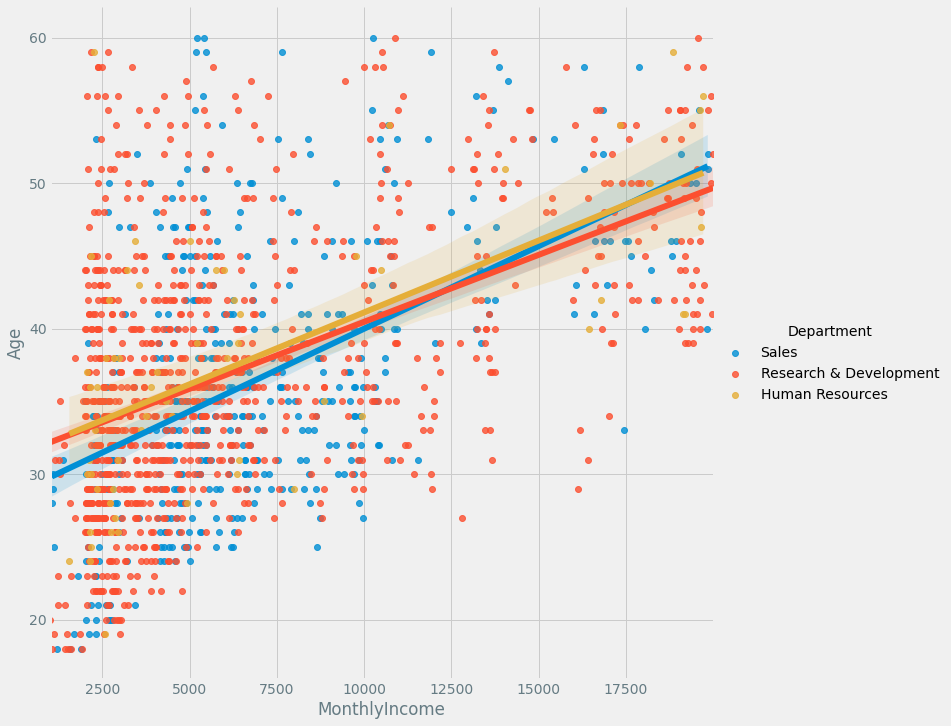

In [ ]:
sns.lmplot(x = 'MonthlyIncome', y = 'Age', size =10, hue = 'Department', data = emp.loc[emp['Department'].isin(['Human Resources','Research & Development','Sales'])]);
plt.show();

*INSIGHTS FROM - Employes_Info : Dept_Age_Income*


Above Plot shows the employes info with respect to Age and Income in respective Department.

**DEPT_AGE_INCOME :**
*   It is visible that most number of employes belong from age 25 - 40 with monthly income between 2500 - 10000.
*   Employes having higher monthly income 15000 - 17500  belong to the age group of 40-60.
*   Highest Earning employe is of age 60 years whose monthly income is above 17500 and belongs to R&D department.
*   Most of the Employes of age 25 - 40 years belong to R&D department and Sales Department.

*This shows most of the R&D employes are Freshers or having experiencee of upto 8 years and also, the Senior employes of R&D department have experience of more than 10 years*.

*Most Experienced Employ belongs to Sales Department but has a very less Monthly Income*.

*Even if HR Department Employes are less in number,they are well Experienced and have a very High Monthly Income*.




---



**DEPT WISE JOB INVOLVEMENT OF EMPLOYES WRT AGE**

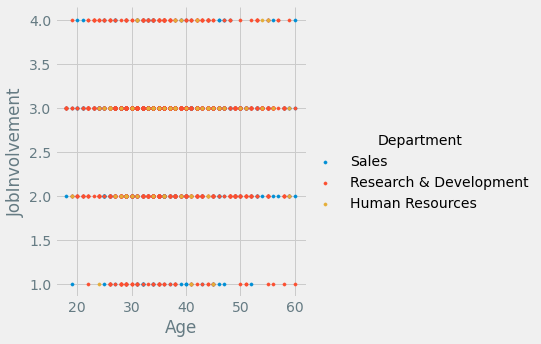

In [ ]:
sns.FacetGrid(emp,hue = 'Department',size = 5).map(plt.scatter, 'Age','JobInvolvement', s = 10).add_legend()
plt.show();



---



*INSIGHTS FROM PLOT OF DEPT WISE JOB INVOLVEMENT OF EMPLOYES WRT AGE*

**DEPT - JOB INVOLVEMENT - AGE**
*   Most of the employes of R&D department of age 20 - 40 have shown less job involvement and also job involvement of employes of HR department of age 26-31 have shown less job involvement.


*Age is also a factor for job involvement,where as employes of less age might have other reasons for poor job involvement*.



---



**DEPT WISE JOB INVOLVEMENT OF EMPLOYES WRT INCOME**

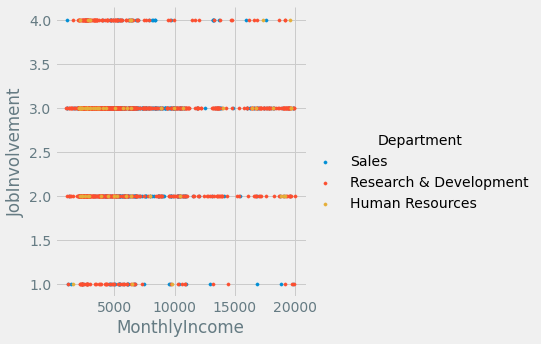

In [ ]:
sns.FacetGrid(emp,hue = 'Department',size = 5).map(plt.scatter, 'MonthlyIncome','JobInvolvement',s = 10).add_legend()
plt.show();

*INSIGHTS FROM PLOT OF DEPT WISE JOB INVOLVEMENT OF EMPLOYES WRT INCOME :*

**DEPT - MONTHLY INCOME - JOB INVOLVEMENT**
*   Employes of R&D and HR have shown very poor Job Involvement and it is seen that they have a very low income which ranges between 2500 - 12500.
*   Sales Department on the other hand have shown Good Job Involvement irrespective of Monthly Income.

*Less Income can also be a factor for poor Job Involvement of employes*.




---



**DEPARTMENTS CONTAINING MOST TRAVELLING**


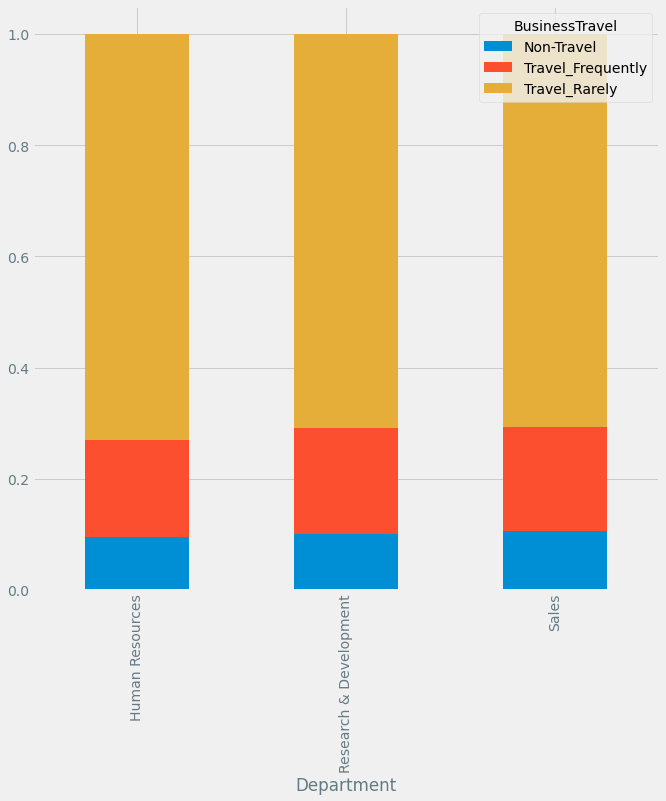

In [ ]:
dep_travel = pd.crosstab(emp['Department'],emp['BusinessTravel'])
dep_travel.div(dep_travel.sum(1).astype(float), axis = 0 ).plot(kind = 'bar', stacked = True,figsize = (10,10));

*INSIGHTS FROM THE PLOT OF DEPARTMENT WISE TRAVELLING*

**DEPARTMENT - TRAVELLING**
*   It is seen all the departments have equal amount of travelling involved but R&D department consists of slightly more travelling when compared to other departrments.

*Employes of R&D department have also shown poor Job Involvement and also have less Monthly Income but have more travelling involved*.



---







**EMPLOYES TRAVEL TO JOB INVOLVEMENT**

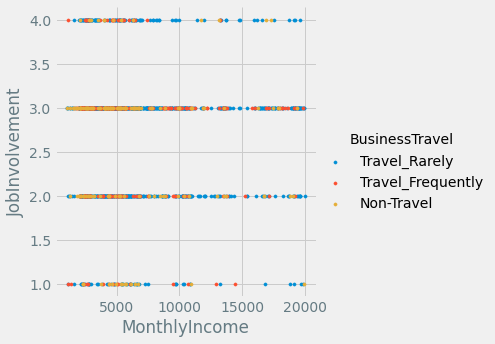

In [ ]:
sns.FacetGrid(emp,hue = 'BusinessTravel',size = 5).map(plt.scatter, 'MonthlyIncome','JobInvolvement',s = 10).add_legend();



---



*INSIGHTS FROM PLOT OF EMPLOYES TRAVEL TO JOB INVOLVEMENT :*

**EMPLOYES TRAVEL - JOB INVOLVEMENT**


*   From the plot it is clearly seen that employes who have less income and employes who do not travel have shown very poor Job Involvement when compared to other employes.
*   Non - Travel Employes have income between 2500 - 8000.


*Employes are Intrested Travel or have a good Monthly Income,which when not provided show poor performance and involvement in Job*.




---



In [ ]:
# Dropping Bins Created.
emp.drop(['YearsWithCurrManager_bin','PercentSalaryHike_bin','YearsSinceLastPromotion_bin','YearsInCurrentRole_bin','YearsAtCompany_bin','TotalWorkingYears_bin','NumCompaniesWorked_bin','MonthlyRate_bin','MonthlyIncome_bin','HourlyRate_bin','DistanceFromHome_bin','DailyRate_bin'], axis = 1,inplace=True)

# ENCODING

In [ ]:
#Encoding and Dropping Dummies:

Encoded_emp = pd.get_dummies(emp,columns=['Attrition','OverTime','BusinessTravel','Department','Gender','MaritalStatus', 'JobRole','EducationField'], drop_first = True)
Encoded_emp.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
Encoded_emp.shape

(1470, 45)

In [ ]:
# Splitting The Encoded DF to Target And Features

# Assigning Features
X = Encoded_emp.drop('Attrition_Yes', axis = 1)

# Assigning Target
Y = Encoded_emp['Attrition_Yes']

# STANDARD SCALER

In [ ]:
# Creating Duplicate Data Frame by Copying.
x_copy = X.copy()

In [ ]:
# Importing Library
from sklearn.preprocessing import StandardScaler

# Fitting and Transforming The Features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# Converting Into Data Frame
X = pd.DataFrame(X)

#Copying The Columns From Duplicate DF to New DF
X.columns = x_copy.columns



---


As the results after applying Standard Scaler were not up to the Mark, another methodology of Sampling had to be used, SMOTE.


---



# SMOTE

In [ ]:
# Importing The Libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

# Creating Object For SMOTE
os = SMOTE()

# Fitting Features And Target Values in SMOTE
X_os, Y_os = os.fit_sample(X,Y)
print("The number of classes before fit {}".format(Counter(Y)))
print("The number of classes after fit {}".format(Counter(Y_os)))

The number of classes before fit Counter({0: 1233, 1: 237})
The number of classes after fit Counter({1: 1233, 0: 1233})


In [ ]:
# Converting Into New Oversampled Data Frame
X_os = pd.DataFrame(X_os)

#Copying The Columns From Duplicate DF to New Oversampled DF
X_os.columns = x_copy.columns

In [ ]:
# Renaming Obtained Oversampled DF Columns:
X_os.rename(columns={'JobRole_Sales Executive': 'JobRole_Sales_Executive', 'EducationField_Life Sciences': 'EducationField_Life_Sciences', 'Department_Research & Development' : 'Department_Research_Development'}, inplace = True)

# ML Models

In [ ]:
# Importing ML Libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

## **Logistic Regression**

In [ ]:
# Importing LogisticRegression Library
from sklearn.linear_model import LogisticRegression

i=1

#performing Stratified KFold Cross Validation
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_os,Y_os):
  print('\n{} of kfold {}'.format(i,kf.n_splits))

  #Splitting Data into Train,Test
  xtr,xvl = X_os.loc[train_index],X_os.loc[test_index]
  ytr,yvl = Y_os[train_index],Y_os[test_index]

  # Creating Model Object
  model = LogisticRegression()
  model.fit(xtr, ytr)

  # Predecting Target Values from X Test
  pred_test = model.predict(xvl)

  # Creating a Confusion Matrix
  cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
  print('Confusion Matrix',cnf_matrix)

  # Calculating The Accuracy
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)

  # Calculating The Precision
  precision = metrics.precision_score(yvl,pred_test)
  print('precision_score',precision)

  #Calculating The Recall
  recall = metrics.recall_score(yvl,pred_test)
  print('recall_score',precision)
  i+=1


1 of kfold 5
Confusion Matrix [[195  52]
 [ 58 189]]
accuracy_score 0.7773279352226721
precision_score 0.7842323651452282
recall_score 0.7842323651452282

2 of kfold 5
Confusion Matrix [[176  70]
 [ 44 203]]
accuracy_score 0.768762677484787
precision_score 0.7435897435897436
recall_score 0.7435897435897436

3 of kfold 5
Confusion Matrix [[186  60]
 [ 55 192]]
accuracy_score 0.7667342799188641
precision_score 0.7619047619047619
recall_score 0.7619047619047619

4 of kfold 5
Confusion Matrix [[187  60]
 [ 47 199]]
accuracy_score 0.7829614604462475
precision_score 0.7683397683397684
recall_score 0.7683397683397684

5 of kfold 5
Confusion Matrix [[192  55]
 [ 43 203]]
accuracy_score 0.8012170385395537
precision_score 0.7868217054263565
recall_score 0.7868217054263565




---


*   After applying Logistic Regression Model to the cleaned, oversampled dataset, the results were not satisfactory.
*   In order to get high accurate result and good precision, recall score other models were also supposed to be tried.


---













## **DecisionTreeClassifier**

In [ ]:
# Importing LogisticRegression Library
from sklearn.tree import DecisionTreeClassifier

i=1

#performing Stratified KFold Cross Validation
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_os,Y_os):
  print('\n{} of kfold {}'.format(i,kf.n_splits))

  #Splitting Data into Train,Test
  xtr,xvl = X_os.loc[train_index],X_os.loc[test_index]
  ytr,yvl = Y_os[train_index],Y_os[test_index]

  # Creating Model Object
  model = DecisionTreeClassifier(random_state=1, max_depth=10)
  model.fit(xtr, ytr)

  # Predecting Target Values from X Test
  pred_test = model.predict(xvl)

  # Creating a Confusion Matrix
  cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
  print('Confusion Matrix',cnf_matrix)

  # Calculating The Accuracy
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)

  # Calculating The Precision
  precision = metrics.precision_score(yvl,pred_test)
  print('precision_score',precision)

  #Calculating The Recall
  recall = metrics.recall_score(yvl,pred_test)
  print('recall_score',precision)
  i+=1


1 of kfold 5
Confusion Matrix [[215  32]
 [ 38 209]]
accuracy_score 0.8582995951417004
precision_score 0.8672199170124482
recall_score 0.8672199170124482

2 of kfold 5
Confusion Matrix [[199  47]
 [ 28 219]]
accuracy_score 0.847870182555781
precision_score 0.8233082706766918
recall_score 0.8233082706766918

3 of kfold 5
Confusion Matrix [[211  35]
 [ 35 212]]
accuracy_score 0.8580121703853956
precision_score 0.8582995951417004
recall_score 0.8582995951417004

4 of kfold 5
Confusion Matrix [[207  40]
 [ 29 217]]
accuracy_score 0.8600405679513184
precision_score 0.8443579766536965
recall_score 0.8443579766536965

5 of kfold 5
Confusion Matrix [[196  51]
 [ 37 209]]
accuracy_score 0.821501014198783
precision_score 0.8038461538461539
recall_score 0.8038461538461539




---


*   After applying Decision Tree Classifier Model to the cleaned, oversampled dataset, the results were not satisfactory.
*   In order to get high accurate result and good precision, recall score other models were also supposed to be tried.
*   Hence Ensembling learning was the optimum method to be tried.


---








# Ensemble Learning

## Random Forest Classifier

In [ ]:
# Creating Empty Lists
acc = []
pre = []
rec = []

# Importing Random Forest Classifier Library
from sklearn.ensemble import RandomForestClassifier
i=1

# Performing Stratified K Fold Cross Validation
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X_os,Y_os):
  print('\n{} of kfold {}'.format(i,kf.n_splits))

  #Splitting Data into Train,Test
  xtr,xvl = X_os.loc[train_index],X_os.loc[test_index]
  ytr,yvl = Y_os[train_index],Y_os[test_index]

  # Creating Model Object
  model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.1, n_estimators=700,
                       random_state=None,
                       verbose=0)
  model.fit(xtr, ytr)

  # Predecting Target Values from X Test
  pred_test = model.predict(xvl)

  # Predecting Target Values from X Train
  y_train_pred = model.predict(xtr)

  # Creating a Confusion Matrix
  cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
  print('Confusion Matrix',cnf_matrix)

  # Calculating The Test Accuracy
  score = accuracy_score(yvl,pred_test)

  # Appending The Obtained Accuracy To The List Created
  acc.append(score)
  print('test accuracy_score',score)

  # Calculating The Train Accuracy
  score1 = accuracy_score(ytr,y_train_pred)
  print('train accuracy_score',score1)

  # Calculating The Precision
  precision = metrics.precision_score(yvl,pred_test)

  # Appending Obtained Precision To The List Created
  pre.append(precision)
  print('precision_score',precision)

  # Calculating The Recall
  recall = metrics.recall_score(yvl,pred_test)

  #Appending Obtained Recall To List Cteated
  rec.append(recall)
  print('recall_score',precision)
  i+=1

print('\nAverage Accuracy', np.mean(acc))
print('\nAverage Precision', np.mean(pre))
print('\nAverage Recall', np.mean(rec))


1 of kfold 5
Confusion Matrix [[215  32]
 [ 51 196]]
test accuracy_score 0.8319838056680162
train accuracy_score 0.8311359026369168
precision_score 0.8596491228070176
recall_score 0.8596491228070176

2 of kfold 5
Confusion Matrix [[201  45]
 [ 52 195]]
test accuracy_score 0.8032454361054767
train accuracy_score 0.8357830714647745
precision_score 0.8125
recall_score 0.8125

3 of kfold 5
Confusion Matrix [[216  30]
 [ 51 196]]
test accuracy_score 0.8356997971602435
train accuracy_score 0.8312214901165738
precision_score 0.8672566371681416
recall_score 0.8672566371681416

4 of kfold 5
Confusion Matrix [[214  33]
 [ 58 188]]
test accuracy_score 0.8154158215010142
train accuracy_score 0.8418651799290421
precision_score 0.8506787330316742
recall_score 0.8506787330316742

5 of kfold 5
Confusion Matrix [[212  35]
 [ 49 197]]
test accuracy_score 0.8296146044624746
train accuracy_score 0.8408514951849975
precision_score 0.8491379310344828
recall_score 0.8491379310344828

Average Accuracy 0.8231

In [ ]:
pd.DataFrame({'Variable':X_os.columns,'Importance':model.feature_importances_}).sort_values('Importance', ascending = False)

,Variable,Importance
23,OverTime_Yes,0.206065
15,StockOptionLevel,0.106152
22,YearsWithCurrManager,0.065832
7,JobLevel,0.061591
16,TotalWorkingYears,0.057025
19,YearsAtCompany,0.055271
20,YearsInCurrentRole,0.049665
30,MaritalStatus_Single,0.049588
0,Age,0.043477
6,JobInvolvement,0.041264


### HYPERPARAMETER OPTIMIZATION FOR RANDOM FOREST CLASSIFIER

In [ ]:
# Importing The Library
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


**RANDOMIZED CV**

In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_os,Y_os)

In [ ]:
rf_randomcv.best_params_

In [ ]:
rf_randomcv

In [ ]:
best_random_grid=rf_randomcv.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_os,Y_os)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_




---


*   After applying Random Forest Classifier, improved results were shown when compared to Logistic Regression and Decision Tree Classifier Models
*   Hyperparameter Optimization was also done for better results.
*   Even after applying this method, there was still a chance for increasing the accuracy, score.
*   The results were showing that the obtained data is an over fit to the model, hence XG Boost Model was used.


---





## XG Boost

In [ ]:
# Importing The Library

from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# Creating Empty Lists
test_acc = []
train_acc = []
pre = []
rec = []

i=1

# Performing Stratified KFold Cross Validation
kf = KFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_os,Y_os):
  print('\n{} of kfold {}'.format(i,kf.n_splits))

  #Splitting Data into Train,Test
  xtr,xvl = X_os.loc[train_index],X_os.loc[test_index]
  ytr,yvl = Y_os[train_index],Y_os[test_index]

  # Creating Model Object
  model = XGBClassifier(colsample_bylevel = 0.5,colsample_bytree = 0.5,gamma =0.1,learning_rate = 0.1,max_depth = 8,min_child_weight = 15, n_estimators = 100,subsample=0.3)
  model.fit(xtr, ytr,early_stopping_rounds=4,eval_metric='error',eval_set=[(xvl,yvl)],verbose=0)

  # Predecting Target Values from X Test
  pred_test = model.predict(xvl)

  # Predecting Target Values from X Train
  y_train_pred = model.predict(xtr)

  # Creating a Confusion Matrix
  cnf_matrix = metrics.confusion_matrix(yvl,pred_test)
  print('Confusion Matrix',cnf_matrix)

  # Calculating The Test Accuracy
  score = accuracy_score(yvl,pred_test)

  # Appending The Obtained Test Accuracy To The List Created
  test_acc.append(score)
  print('test accuracy_score',score)

  # Calculating The Train Accuracy
  score1 = accuracy_score(ytr,y_train_pred)

  # Appending The Obtained Train Accuracy To The List Created
  train_acc.append(score1)
  print('train accuracy_score',score1)

  # Calculating The Precision
  precision = metrics.precision_score(yvl,pred_test)

  # Appending The Obtained Precision To The List Created
  pre.append(precision)
  print('precision_score',precision)

  # Calculating The Recall
  recall = metrics.recall_score(yvl,pred_test)

  # Appending The Obtained Recall To The List Created
  rec.append(recall)
  print('recall_score',precision)

  # Calculating The F1 Score
  f1 = metrics.f1_score(yvl,pred_test)
  print('F1 Score :' , f1)

  i+=1

print('\nAverage Test Accuracy', np.mean(test_acc)*100)
print('\nAverage Train Accuracy', np.mean(train_acc)*100)
print('\nAverage Precision', np.mean(pre))
print('\nAverage Recall', np.mean(rec))


1 of kfold 5
Confusion Matrix [[205  32]
 [ 58 199]]
test accuracy_score 0.8178137651821862
train accuracy_score 0.8453346855983773
precision_score 0.8614718614718615
recall_score 0.8614718614718615
F1 Score : 0.8155737704918032

2 of kfold 5
Confusion Matrix [[190  36]
 [ 58 209]]
test accuracy_score 0.8093306288032455
train accuracy_score 0.8342625443487075
precision_score 0.8530612244897959
recall_score 0.8530612244897959
F1 Score : 0.8164062500000001

3 of kfold 5
Confusion Matrix [[242  18]
 [ 29 204]]
test accuracy_score 0.9046653144016227
train accuracy_score 0.8737962493664471
precision_score 0.918918918918919
recall_score 0.918918918918919
F1 Score : 0.8967032967032967

4 of kfold 5
Confusion Matrix [[218  37]
 [ 44 194]]
test accuracy_score 0.8356997971602435
train accuracy_score 0.8322351748606184
precision_score 0.8398268398268398
recall_score 0.8398268398268398
F1 Score : 0.8272921108742004

5 of kfold 5
Confusion Matrix [[234  21]
 [ 52 186]]
test accuracy_score 0.851926

In [ ]:

X_os.shape

(2466, 44)

In [ ]:
# Creating Feature Importance Data Frame
pd.DataFrame({'Variable':X_os.columns,'Importance':model.feature_importances_}).sort_values('Importance', ascending = False)

,Variable,Importance
23,OverTime_Yes,0.099049
15,StockOptionLevel,0.061590
24,BusinessTravel_Travel_Frequently,0.059951
19,YearsAtCompany,0.048503
30,MaritalStatus_Single,0.048354
22,YearsWithCurrManager,0.045062
18,WorkLifeBalance,0.044836
41,EducationField_Medical,0.043742
8,JobSatisfaction,0.042852
7,JobLevel,0.039185


In [ ]:
# Dropping The Unnecessary Columns According To The Feature Importance Data Frame
drops =['YearsSinceLastPromotion', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree','TrainingTimesLastYear','PerformanceRating','Education','EducationField_Other','EducationField_Medical','JobRole_Research Scientist','EducationField_Marketing','JobRole_Sales Representative','JobRole_Human Resources','JobRole_Research Director','JobRole_Manufacturing Director','JobRole_Manager','MaritalStatus_Married','BusinessTravel_Travel_Frequently','JobInvolvement','BusinessTravel_Travel_Rarely']
X_os.drop(drops, axis = 1, inplace=True)

# After Dropping The Columns, Run The XGB Algorithm Again


###**Precision - Recall Curve for XG Boost Classifier**

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

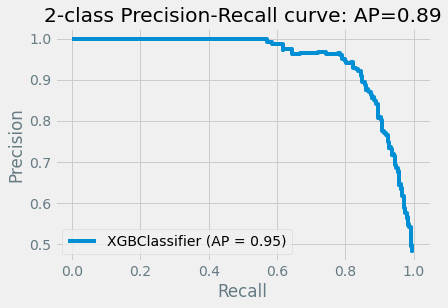

In [ ]:
# Importing Libraries For Precision And Recal Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Plotting The Precision And Recall Curve
disp = plot_precision_recall_curve(model, xvl, yvl)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(np.mean(pre)))

*INSIGHTS FROM **PRECISION - RECALL CURVE** OF XGBOOST CLASSIFIER*

**Precision :** Precision is a measure of Result Relevancy

$$Precision = \frac{T_{p}}{T_{p} + F_{p}}$$

**Recall :** Recall is a measure of how many truly Relevant Results are Returned

$$Recall = \frac{T_{p}}{T_{p} + F_{n}}$$

**Precision - Recall Curve :**
*   High area under the curve represents both high recall and high precision.
*   High Precision relates to a low False Positive rate.
*   High Recall relates to a low False Negative rate.



### **ROC Curve For XGB Classifier**

In [ ]:
# Importing Libraries For ROC Curve
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
XGB : ROC AUC=0.885


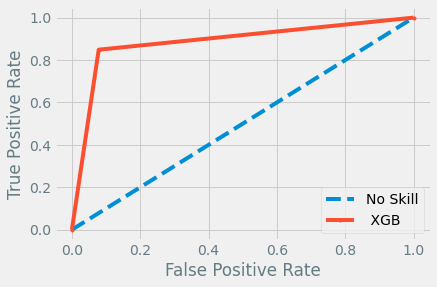

In [ ]:
# Calculating The Probabilities of Targets
ns_probs = [0 for _ in range(len(yvl))]

# calculate scores
ns_auc = roc_auc_score(yvl, ns_probs)
RF_auc = roc_auc_score(yvl, pred_test)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB : ROC AUC=%.3f' % (RF_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(yvl, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(yvl, pred_test)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label=' XGB')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

*INSIGHTS FROM **ROC CURVE** OF XGBOOST CLASSIFIER*

**True Positive :** An outcome where the model correctly predicts the positive class.

**True Negative :** An outcome where the model correctly predicts the negative class.

**False Positive :** An outcome where the model incorrectly predicts the positive class.

**False Negative :** An outcome where the model incorrectly predicts the negative class.


**ROC CURVE :**
*   Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
*   Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.





### HYPERPARAMETER OPTIMIZATION

In [ ]:
# Importing Libraries for Hypermarameter Optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
# Creating a Random Grid
params={
  "n_estimators"    : [int(x) for x in np.linspace(20,1000,10)],
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [int(x) for x in np.linspace(6,30,1)],
 "min_child_weight" : [1,2,3,4,5,6,7,8,9,10],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
# Assigning Classifier
classifier=xgboost.XGBClassifier()

# Using Randomized SearchCV to Search Best Parameters
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',cv=5,verbose=2,random_state=100,n_jobs=-1)
random_search.fit(X_os,Y_os)

In [ ]:
# Retriving Best Estimators
random_search.best_estimator_

In [ ]:
# Retriving Best Parameters
random_search.best_params_




---


*   XG Boost Classifier had given good results and the model was also not an Over Fit.
*   To still go further and explore the probabilities of obtaining good accuracy and a good model, Deep Learning was Tried using Keras Neural Networks.


---





# KERAS

In [ ]:
# Importing Keras Libraries
import keras
from sklearn.mdoel_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Splitting Test, Train Data
x_train,x_test,y_train,y_test = train_test_split(X_os,Y_os, test_size = 0.3, random_state = 5)

In [ ]:
# Fitting the Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Building The Model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim = x_train.shape[1]))

model.add(Dense(70,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(80,activation='relu'))

model.add(Dense(100,activation='relu'))

model.add(Dense(50,activation='relu'))

model.add(Dense(25,activation='relu'))

model.add(Dense(12,activation='relu'))

model.add(Dense(1,activation = 'sigmoid'))




In [ ]:
# Compiling The Model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Assigning Early Stopping Condition
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

# Assigning and Running The Epochs
model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor],verbose=2,epochs=1000)
model.summary()

Epoch 1/1000
54/54 - 3s - loss: 0.6370 - accuracy: 0.6309 - val_loss: 0.5070 - val_accuracy: 0.7676
Epoch 2/1000
54/54 - 0s - loss: 0.4286 - accuracy: 0.8134 - val_loss: 0.4238 - val_accuracy: 0.8203
Epoch 3/1000
54/54 - 0s - loss: 0.3149 - accuracy: 0.8714 - val_loss: 0.3850 - val_accuracy: 0.8514
Epoch 4/1000
54/54 - 0s - loss: 0.2037 - accuracy: 0.9276 - val_loss: 0.3696 - val_accuracy: 0.8527
Epoch 5/1000
54/54 - 0s - loss: 0.1269 - accuracy: 0.9502 - val_loss: 0.4210 - val_accuracy: 0.8622
Epoch 6/1000
54/54 - 0s - loss: 0.0609 - accuracy: 0.9838 - val_loss: 0.3880 - val_accuracy: 0.9108
Epoch 7/1000
54/54 - 0s - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.4462 - val_accuracy: 0.8946
Epoch 8/1000
54/54 - 0s - loss: 0.0551 - accuracy: 0.9815 - val_loss: 0.3066 - val_accuracy: 0.9176
Epoch 9/1000
54/54 - 0s - loss: 0.0209 - accuracy: 0.9942 - val_loss: 0.3197 - val_accuracy: 0.9324
Epoch 10/1000
54/54 - 0s - loss: 0.0272 - accuracy: 0.9890 - val_loss: 0.4838 - val_accuracy: 0.9041

In [ ]:
# Predicting The Targets
y_pred = model.predict(x_test)

In [ ]:
# Converting continous integers to Binary
predicted_Attrition = np.argmax(y_pred,axis = 1)

In [ ]:
# Checking Loss, Score obtained
loss,score = model.evaluate(x_test,y_test,verbose=0)
print(loss)
print(score)

0.30655044317245483
0.9175675511360168


In [ ]:
# F1 Score
f1 = metrics.f1_score(y_test, predicted_Attrition)
print('F1 Score :' , f1)

F1 Score : 0.0


In [ ]:
# Determining Confusion Matrix.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predicted_Attrition)
cnf_matrix

array([[359,   0],
       [381,   0]])

In [ ]:
import sklearn

In [ ]:
#  Classification report

print(sklearn.metrics.classification_report(y_test, predicted_Attrition, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))


              precision    recall  f1-score   support

           0       0.49      1.00      0.65       359
           1       0.00      0.00      0.00       381

    accuracy                           0.49       740
   macro avg       0.24      0.50      0.33       740
weighted avg       0.24      0.49      0.32       740





---


*   The Results after using keras were not satisfactory
*   Another method of Keras was to be used where inputs were given individually.


---





## KERAS2

In [ ]:
# Converting obtained oversampled Targets to Dataframe
y_os_df = pd.DataFrame(Y_os, columns=['Attrition'])

In [ ]:
# Importing Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Splittinhg the Training data and testing data of features.
val_emp = X_os.sample(frac=0.2, random_state=1337)
train_emp = X_os.drop(val_emp.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_emp), len(val_emp))
)

Using 1973 samples for training and 493 for validation


In [ ]:
# Splittinhg the Training data and testing data of Targets.

att_val = y_os_df.sample(frac=0.2, random_state=1337)
att_train = y_os_df.drop(val_emp.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(att_train), len(att_val))
)

In [ ]:
# Creating a function to Slice and Shuffle the Training data
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = att_train
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


Train_ds = dataframe_to_dataset(train_emp)


In [ ]:
# Creating a function to Slice and Shuffle the Validation data
def dataframe_to_dataset(data_frame):
    data_frame = data_frame.copy()
    labels = att_val
    ds = tf.data.Dataset.from_tensor_slices((dict(data_frame), labels))
    ds = ds.shuffle(buffer_size=len(data_frame))
    return ds

Val_ds = dataframe_to_dataset(val_emp)

In [ ]:
for x, y in Train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Age': <tf.Tensor: shape=(), dtype=float64, numpy=0.3795305854062957>, 'DailyRate': <tf.Tensor: shape=(), dtype=float64, numpy=-0.15954328916270819>, 'DistanceFromHome': <tf.Tensor: shape=(), dtype=float64, numpy=0.6413127272726498>, 'EnvironmentSatisfaction': <tf.Tensor: shape=(), dtype=float64, numpy=0.2546249253678617>, 'HourlyRate': <tf.Tensor: shape=(), dtype=float64, numpy=-1.3526666977744795>, 'JobLevel': <tf.Tensor: shape=(), dtype=float64, numpy=-0.9614863916702531>, 'JobSatisfaction': <tf.Tensor: shape=(), dtype=float64, numpy=0.4283237093910923>, 'MonthlyIncome': <tf.Tensor: shape=(), dtype=float64, numpy=-0.8704083311941618>, 'MonthlyRate': <tf.Tensor: shape=(), dtype=float64, numpy=-0.16410397282213027>, 'NumCompaniesWorked': <tf.Tensor: shape=(), dtype=float64, numpy=2.5255909693862573>, 'PercentSalaryHike': <tf.Tensor: shape=(), dtype=float64, numpy=0.6002081934466081>, 'RelationshipSatisfaction': <tf.Tensor: shape=(), dtype=float64, numpy=1.0056698109927649>, 'S

In [ ]:
# Creating Batches
Train_ds = Train_ds.batch(32)
Val_ds = Val_ds.batch(32)

In [ ]:
# Importing Libraries
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup

In [ ]:
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature



In [ ]:
def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature




In [ ]:
def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature

In [ ]:
# Categorical features encoded as integers
OverTime_Yes = keras.Input(shape=(1,), name="OverTime_Yes", dtype="int64")
Department_Sales = keras.Input(shape=(1,), name="Department_Sales", dtype="int64")
Gender_Male = keras.Input(shape=(1,), name="Gender_Male", dtype="int64")
MaritalStatus_Single = keras.Input(shape=(1,), name="MaritalStatus_Single", dtype="int64")
JobRole_Sales_Executive  = keras.Input(shape=(1,), name="JobRole_Sales_Executive", dtype="int64")
EducationField_Life_Sciences = keras.Input(shape=(1,), name="EducationField_Life_Sciences", dtype="int64")
Department_Research_Development = keras.Input(shape=(1,), name="Department_Research_Development", dtype="int64")



In [ ]:
# Numerical features
Age = keras.Input(shape=(1,), name="Age")
DailyRate = keras.Input(shape=(1,), name="DailyRate")
DistanceFromHome = keras.Input(shape=(1,), name="DistanceFromHome")
EnvironmentSatisfaction = keras.Input(shape=(1,), name="EnvironmentSatisfaction")
HourlyRate = keras.Input(shape=(1,), name="HourlyRate")
JobLevel = keras.Input(shape=(1,), name="JobLevel")
JobSatisfaction = keras.Input(shape=(1,), name="JobSatisfaction")
MonthlyIncome = keras.Input(shape=(1,), name="MonthlyIncome")
MonthlyRate = keras.Input(shape=(1,), name="MonthlyRate")
NumCompaniesWorked = keras.Input(shape=(1,), name="NumCompaniesWorked")
PercentSalaryHike= keras.Input(shape=(1,), name="PercentSalaryHike")
RelationshipSatisfaction = keras.Input(shape=(1,), name="RelationshipSatisfaction")
StockOptionLevel = keras.Input(shape=(1,), name="StockOptionLevel")
TotalWorkingYears = keras.Input(shape=(1,), name="TotalWorkingYears")
WorkLifeBalance = keras.Input(shape=(1,), name="WorkLifeBalance")
YearsAtCompany = keras.Input(shape=(1,), name="YearsAtCompany")
YearsInCurrentRole = keras.Input(shape=(1,), name="YearsInCurrentRole")
YearsWithCurrManager = keras.Input(shape=(1,), name="YearsWithCurrManager")


In [ ]:
# List of all Inputs
all_inputs = [
              Age,
              DailyRate,
              DistanceFromHome,
              EnvironmentSatisfaction,
              HourlyRate,
              JobLevel,
              JobSatisfaction,
              MonthlyIncome,
              MonthlyRate,
              NumCompaniesWorked,
              PercentSalaryHike,
              RelationshipSatisfaction,
              StockOptionLevel,
              TotalWorkingYears,
              WorkLifeBalance,
              YearsAtCompany,
              YearsInCurrentRole,
              YearsWithCurrManager,
              OverTime_Yes,
              Department_Research_Development,
              Department_Sales,
              Gender_Male,
              MaritalStatus_Single,
              JobRole_Sales_Executive,
              EducationField_Life_Sciences
]

In [ ]:
# Encoding Categorical Features
Department_Research_Development_Encoded = encode_integer_categorical_feature(Department_Research_Development, "Department_Research_Development", Train_ds)
Department_Sales = encode_integer_categorical_feature(Department_Research_Development, "Department_Sales", Train_ds)
Gender_Encoded = encode_integer_categorical_feature(Gender_Male, "Gender_Male", Train_ds)
MaritalStatus_Encoded = encode_integer_categorical_feature(MaritalStatus_Single, "MaritalStatus_Single", Train_ds)
JobRole_Encoded = encode_integer_categorical_feature(JobRole_Sales_Executive, "JobRole_Sales_Executive", Train_ds)
EducationField_Encoded = encode_integer_categorical_feature(EducationField_Life_Sciences, "EducationField_Life_Sciences", Train_ds)

In [ ]:
# Encoding Neumerical Features
Age_encoded = encode_numerical_feature(Age, "Age", Train_ds)
DailyRate_encoded = encode_numerical_feature(DailyRate, "DailyRate", Train_ds)
DistanceFromHome_encoded = encode_numerical_feature(DistanceFromHome, "DistanceFromHome", Train_ds)
EnvironmentSatisfaction_encoded = encode_numerical_feature(EnvironmentSatisfaction, "EnvironmentSatisfaction", Train_ds)
HourlyRate_encoded = encode_numerical_feature(HourlyRate, "HourlyRate", Train_ds)
JobLevel_encoded = encode_numerical_feature(JobLevel, "JobLevel", Train_ds)
JobSatisfaction_encoded = encode_numerical_feature(JobSatisfaction, "JobSatisfaction", Train_ds)
MonthlyIncome_encoded = encode_numerical_feature(MonthlyIncome, "MonthlyIncome", Train_ds)
MonthlyRate_encoded = encode_numerical_feature(MonthlyRate, "MonthlyRate", Train_ds)
NumCompaniesWorked_encoded = encode_numerical_feature(NumCompaniesWorked, "NumCompaniesWorked", Train_ds)
PercentSalaryHike_encoded = encode_numerical_feature(PercentSalaryHike, "PercentSalaryHike", Train_ds)
RelationshipSatisfaction_encoded = encode_numerical_feature(RelationshipSatisfaction, "RelationshipSatisfaction", Train_ds)
StockOptionLevel_encoded = encode_numerical_feature(StockOptionLevel, "StockOptionLevel", Train_ds)
TotalWorkingYears_encoded = encode_numerical_feature(TotalWorkingYears, "TotalWorkingYears", Train_ds)
WorkLifeBalance_encoded = encode_numerical_feature(WorkLifeBalance, "WorkLifeBalance", Train_ds)
YearsAtCompany_encoded = encode_numerical_feature(YearsAtCompany, "YearsAtCompany", Train_ds)
YearsInCurrentRole_encoded = encode_numerical_feature(YearsInCurrentRole, "YearsInCurrentRole", Train_ds)
YearsWithCurrManager_encoded = encode_numerical_feature(YearsWithCurrManager, "YearsWithCurrManager", Train_ds)

In [ ]:
# List of all Features,creating a Layer
all_features = layers.concatenate(
    [
        Age,
        DailyRate,
        DistanceFromHome,
        EnvironmentSatisfaction,
        HourlyRate,
        JobLevel,
        JobSatisfaction,
        MonthlyIncome,
        MonthlyRate,
        NumCompaniesWorked,
        PercentSalaryHike,
        RelationshipSatisfaction,
        StockOptionLevel,
        TotalWorkingYears,
        WorkLifeBalance,
        YearsAtCompany,
        YearsInCurrentRole,
        YearsWithCurrManager,
        Department_Research_Development,
        Department_Sales,
        Gender_Male,
        MaritalStatus_Single,
        JobRole_Sales_Executive,
        EducationField_Life_Sciences,
    ]
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)


In [ ]:
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

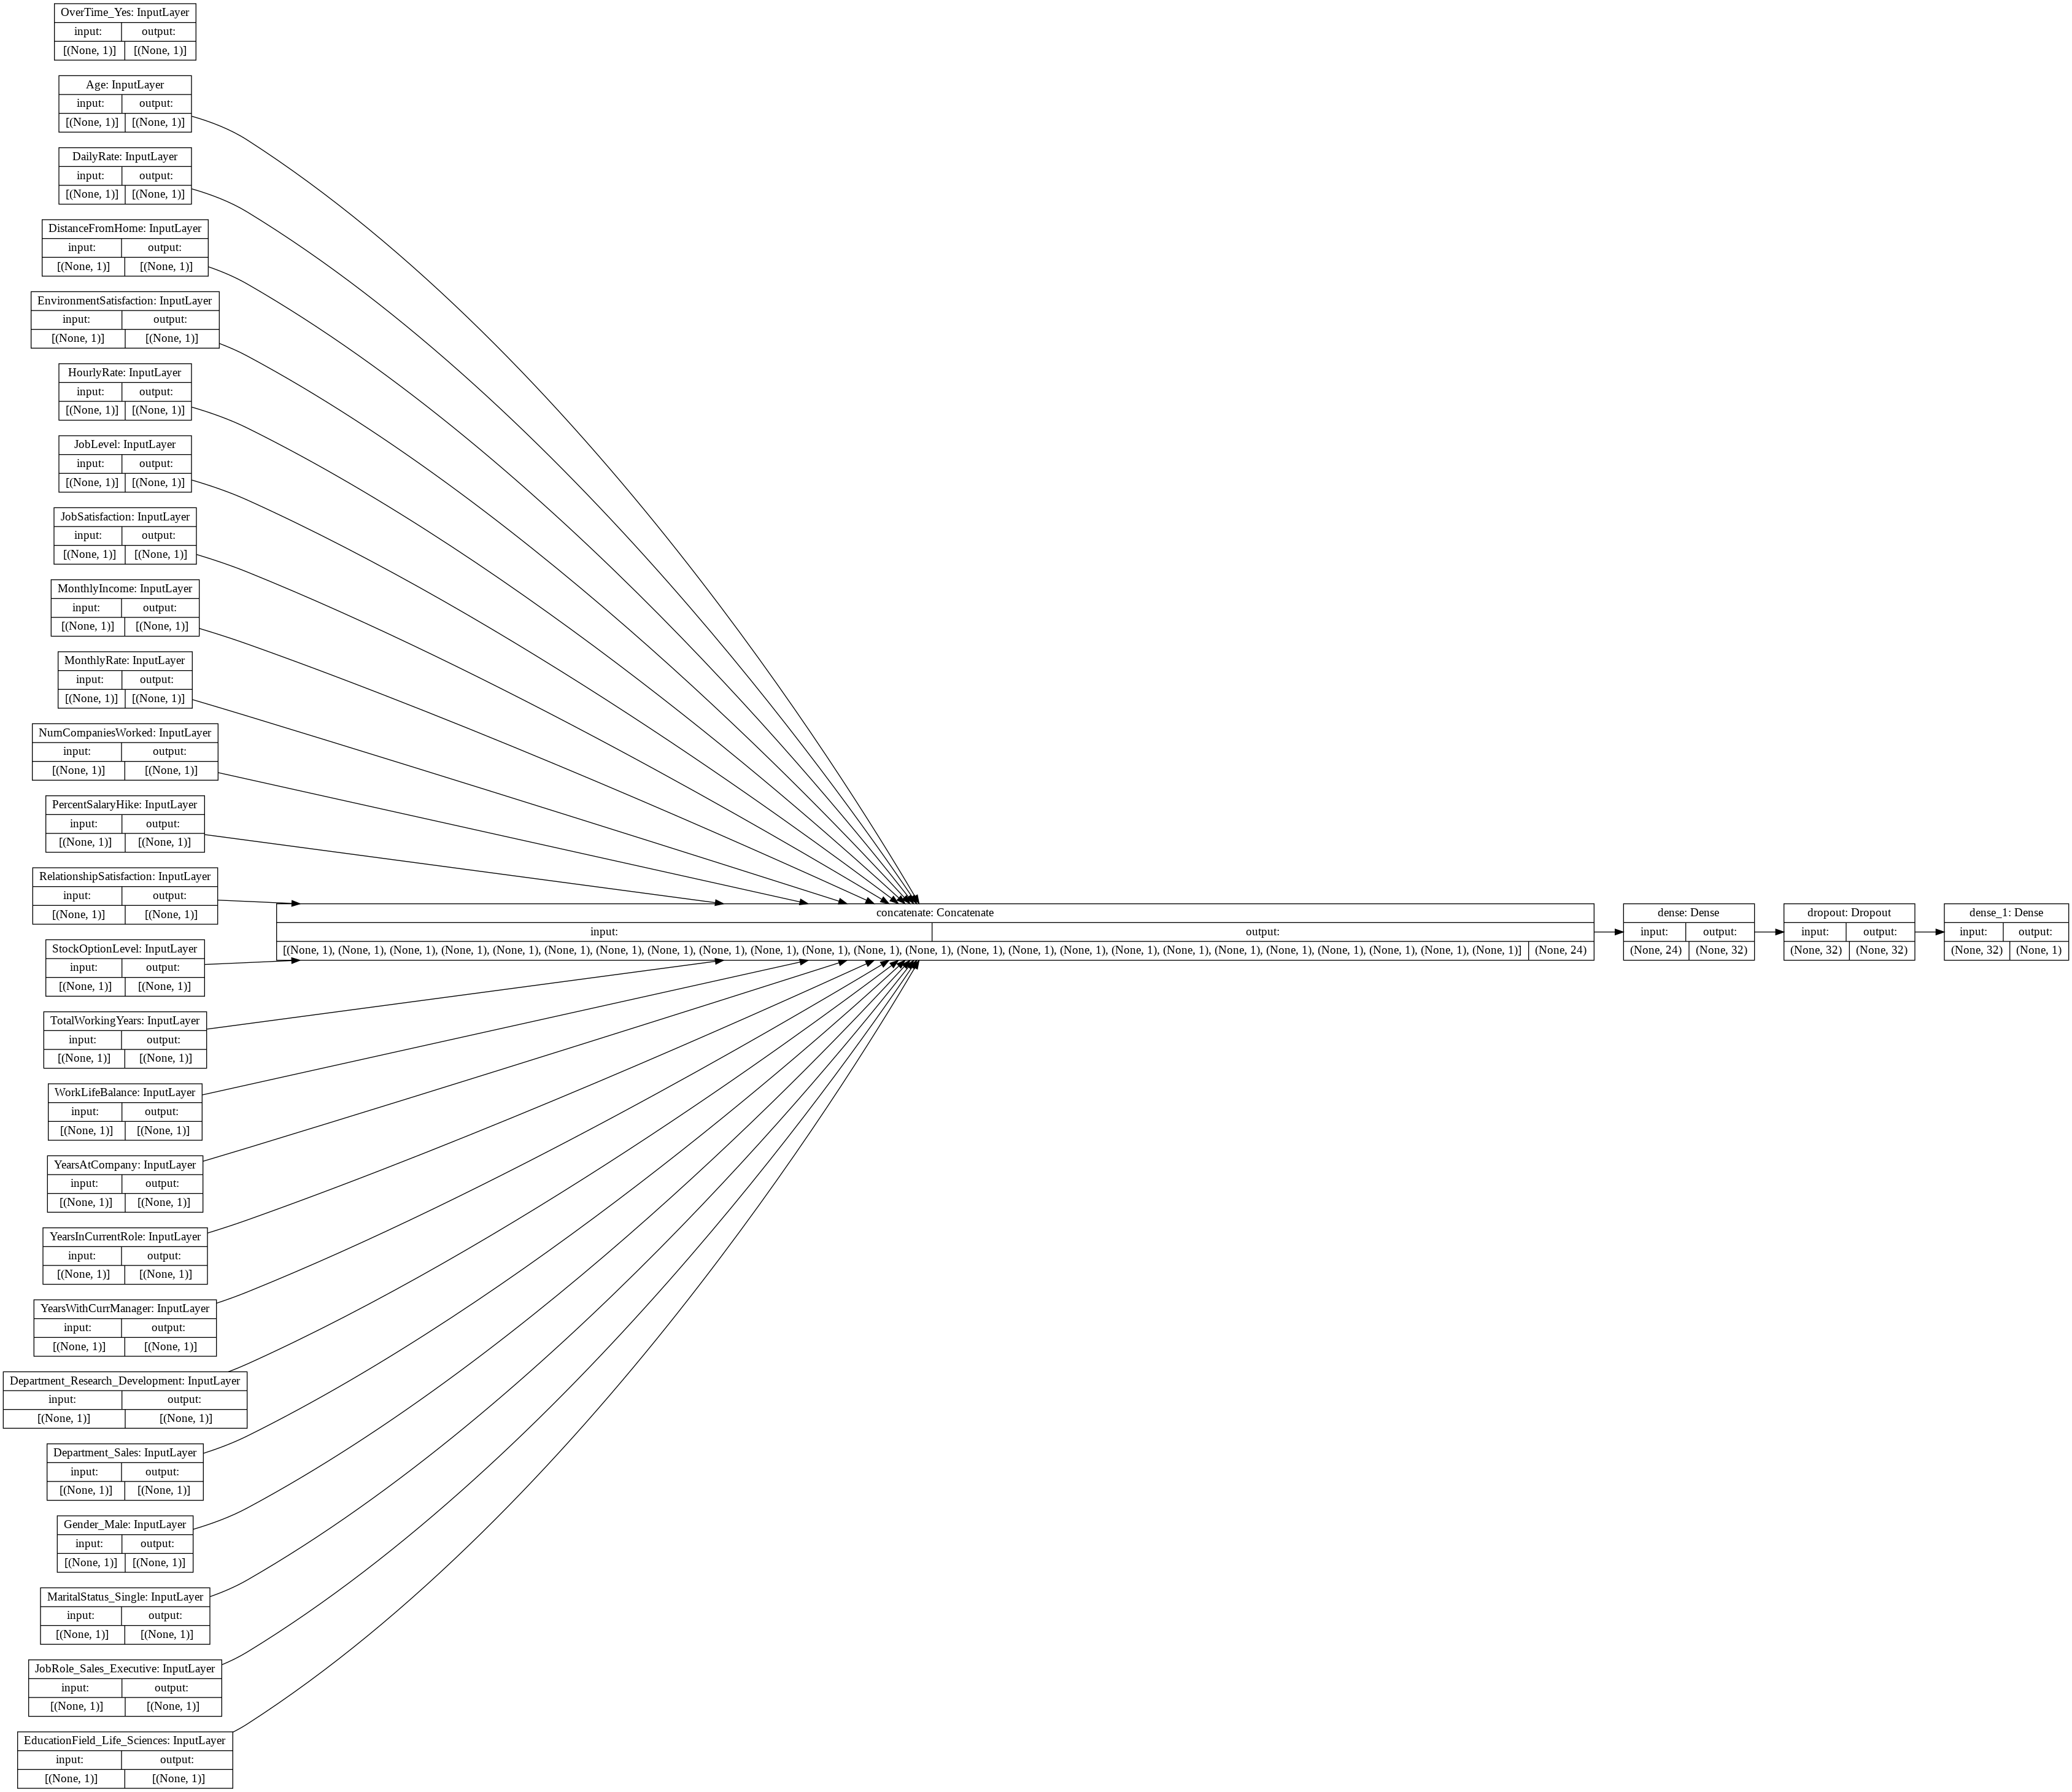

In [ ]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# Early Stopping to avoid Over Fitting
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

#Fitting the data
model.fit(Train_ds, epochs=50, validation_data=Val_ds)

Epoch 1/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4328 - accuracy: 0.8109 - val_loss: 0.4391 - val_accuracy: 0.7972
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.7962 - val_loss: 0.4357 - val_accuracy: 0.7972
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.7998 - val_loss: 0.4360 - val_accuracy: 0.7931
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.7983 - val_loss: 0.4351 - val_accuracy: 0.7992
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8039 - val_loss: 0.4335 - val_accuracy: 0.7992
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4362 - accuracy: 0.8054 - val_loss: 0.4327 - val_accuracy: 0.7972
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4330 - accuracy: 0.8104 - val_loss: 0.4298 - val_accuracy: 0.8012
Epoch 8/50
62/62 [==

In [ ]:
#Predicting the Targets
y_pred = model.predict(Val_ds)

In [ ]:
# Converting obtained Predicted continous Values to Binary.
predicted_Attrition = np.argmax(y_pred,axis = 1)

In [ ]:
# Constructing confusion Matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(att_val, predicted_Attrition)
cnf_matrix

array([[260,   0],
       [233,   0]])

In [ ]:
# Checking Precision and Recall
precision = metrics.precision_score(att_val,predicted_Attrition)
recall = metrics.recall_score(att_val,predicted_Attrition)



---
*    After checking various models, and calculating accuracies and scores from them, the Model which produced good results was **XG Boost**

*    Hence XG Boost model is finalised and saved for post processing.
---





#SAVING & TESTING XGB Model

In [ ]:
# Importing Libraries
import pickle
import numpy as np

file_name = " .pkl"

# Saving The Model
pickle.dump(model, open(file_name, "wb"))

# Loading the Model
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
X_os.head(1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales_Executive,JobRole_Sales Representative,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,0.44635,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.10835,0.72602,2.125136,-1.150554,-0.42623,-1.584178,-0.932014,-0.421642,-2.171982,-2.49382,-0.164613,-0.063296,-0.679146,0.245834,1.591746,-0.481859,0.639841,-1.374051,1.515244,-1.224745,-0.918921,1.45865,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.194045,-0.348255,-0.679141,-0.243059,-0.314093


In [ ]:
# Getting Inputs From The User
details = [input('Enter Age of Employe :' ) , input('Enter DailyRate of Employe:'), input('Enter Distance From Home of Employe:'), input('Enter (out of 1 to 4) Education level of Employe :' ), input('Enter (out of 1 to 4) Environment Satisfaction Level of Employe:' ), input('Enter Hourly Rate of Employe: '), input('Enter (out of 1 to 4) Job Involvement Level of Employe out: '), input('Enter (out of 1 to 4) Job Level of Employe: '), input('Enter (out of 1 to 4) Job Satisfaction Level of Employe: '), input('Enter Monthly Income of Employe: '), input('Enter Monthly Rate of Employe: '), input('Enter Number of Companies Worked by Employe: '), input('Enter Percentage Salary Hike of Employe: '), input('Enter (out of 1 to 4) Performance Rating of Employe: '), input('Enter (out of 1 to 4) Relationship Satisfaction of Employe: '), input('Enter (out of 1 to 4) Stock Option Level of Employe: '), input('Enter Total Working Years of Employe: '), input('Enter Training Times Since Last Year of Employe: '), input('Enter (out of 1 to 4) Work Life Balance Level of Employe: '), input('Enter Years At Company of Employe: '), input('Enter Number of Years In Current Role of Employe: '), input('Enter Number of Years Since Last Promotion of Employe: '), input('Enter Number of Years With Current Manager of Employe: '), input('Enter 1 if Employe does Over Time, else Enter 0: '), input('Enter 1 if Employe does Business Travel Frequently, else Enter 0 : '),input('Enter 1 if Employe does Business Travel Rarely, else Enter 0 : '), input('Enter 1 if Employe belongs to Research And Development Department, else Enter 0 : '), input('Enter 1 if Employe belongs to Sales Department, else Enter 0 : '), input('Enter 1 if Employe is Male, else Enter 0 : '), input('Enter 1 if Employe is Married, else Enter 0 : '), input('Enter 1 if Employe is Single, else Enter 0 : '), input('Enter 1 if Employe Job Role is Human Resource, else Enter 0 : '), input('Enter 1 if Employe Job Role is Laboratory Technician, else Enter 0 : '), input('Enter 1 if Employe Job Role is Manager , else Enter 0 : '), input('Enter 1 if Employe Job Role is Manufacturing Director , else Enter 0 : '), input('Enter 1 if Employe Job Role is Research Director , else Enter 0 : '), input('Enter 1 if Employe Job Role is Research Scientist , else Enter 0 : '), input('Enter 1 if Employe Job Role is Sales Executive , else Enter 0 : '), input('Enter 1 if Employe Job Role is Sales Representative , else Enter 0 : '), input('Enter 1 if Employe Education Field is Life Sciences, else Enter 0 : '), input('Enter 1 if Employe Education Field is Marketing, else Enter 0 : '), input('Enter 1 if Employe Education Field is Medical, else Enter 0 : '), input('Enter 1 if Employe Education Field is Other, else Enter 0 : '), input('Enter 1 if Employe Education Field is Technical Degree, else Enter 0 : ')]

Enter Age of Employe :24
Enter DailyRate of Employe:1166
Enter Distance From Home of Employe:5
Enter (out of 1 to 4) Education level of Employe :3
Enter (out of 1 to 4) Environment Satisfaction Level of Employe:3
Enter Hourly Rate of Employe: 145
Enter (out of 1 to 4) Job Involvement Level of Employe out: 3
Enter (out of 1 to 4) Job Level of Employe: 2
Enter (out of 1 to 4) Job Satisfaction Level of Employe: 2
Enter Monthly Income of Employe: 35000
Enter Monthly Rate of Employe: 35000
Enter Number of Companies Worked by Employe: 1
Enter Percentage Salary Hike of Employe: 20
Enter (out of 1 to 4) Performance Rating of Employe: 3
Enter (out of 1 to 4) Relationship Satisfaction of Employe: 3
Enter (out of 1 to 4) Stock Option Level of Employe: 1
Enter Total Working Years of Employe: 2
Enter Training Times Since Last Year of Employe: 2
Enter (out of 1 to 4) Work Life Balance Level of Employe: 2
Enter Years At Company of Employe: 2
Enter Number of Years In Current Role of Employe: 1
Enter N

In [ ]:
# Converting DataType of items in List to Float
list_of_floats = []
for item in details:
    list_of_floats.append(float(item))

In [ ]:
# Converting List To Array
x = np.array([list_of_floats])

In [ ]:
# Confirming The Shape Of obtained array.
x.shape

# If the Shape of Array is not Matching with shape of Input Data Frame in terms of Columns, Resize the Obtained Array by using array.Resize()

(1, 44)

In [ ]:
# Creating a Data Frame With same COlumn Names as Input Data Frame for the model.
# Injecting Obtained Array Inputs from the User to newly Created Data Frame.
df = pd.DataFrame(x, columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime_Yes','BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely','Department_Research_Development', 'Department_Sales', 'Gender_Male','MaritalStatus_Married', 'MaritalStatus_Single', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director', 'JobRole_Research Scientist','JobRole_Sales_Executive', 'JobRole_Sales Representative','EducationField_Life_Sciences', 'EducationField_Marketing','EducationField_Medical', 'EducationField_Other','EducationField_Technical Degree'])

In [ ]:
# Predicting the Attrition Value
prediction = xgb_model_loaded.predict(df)

# Printing the Predicted Value.
[print('Employe Attritioned') if prediction == 1 else print('Employe Not Attritioned')]

Employe Not Attritioned


[None]

# CONCLUSION:





*   After loading the data, Effective EDA with Univariate and Bivariate analysis was performed.

*   Encoding and Standard Scaling has been performed on the data.
*   The data was Imbalanced, Hence **SMOTE** Over sampling was done.    

*   Different ML algorithms with **SKLearn** on the Obtained Data were implimented like :
> Logistic Regression
>
>Decision Tree Classifier
>
> Random Forest Classifier
>
>XG Boost Classifier

*   Deep Learning Algorithm Was also implimented using **KERAS**.
* Precision, Recall, Accuracy, F1 score, Confusion Matrix were calculated and considered as Performance Metrics.
*  Among all the algorithms, **XGBoost** has given Good results.
>  Hyperparameter optimization was also performed for **XGBoost** Algorithm.
>
> **ROC-AUC** and **Precision-Recall** curves have been plotted.

***Final Accuracy***   = <font color="green"><b>86.8</b></font>

***Final Precision***  = 90.3

***Final Recall***     = 82.8

***Final F1 Score***   = 86.8



